In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import font_manager
from matplotlib.lines import Line2D
import re
import seaborn as sns
import ast

Import Raw data

In [2]:
##Import Raw SMACT data
df_smact_allowed_oxide_low = pd.read_csv('data/SMACT/smact_allowed_oxide_comps_low.csv',header=None)
df_smact_allowed_oxide_medium = pd.read_csv('data/SMACT/smact_allowed_oxide_comps_medium.csv',header=None)
df_smact_allowed_oxide_high = pd.read_csv('data/SMACT/smact_allowed_oxide_comps_high.csv',header=None)
df_smact_allowed_sulfide_low = pd.read_csv('data/SMACT/smact_allowed_sulfide_comps_low.csv',header=None)
df_smact_allowed_sulfide_medium = pd.read_csv('data/SMACT/smact_allowed_sulfide_comps_medium.csv',header=None)
df_smact_allowed_sulfide_high = pd.read_csv('data/SMACT/smact_allowed_sulfide_comps_high.csv',header=None)
df_smact_allowed_selenide_low = pd.read_csv('data/SMACT/smact_allowed_selenide_comps_low.csv',header=None)
df_smact_allowed_selenide_medium = pd.read_csv('data/SMACT/smact_allowed_selenide_comps_medium.csv',header=None)
df_smact_allowed_selenide_high = pd.read_csv('data/SMACT/smact_allowed_selenide_comps_high.csv',header=None)
df_smact_allowed_telluride_low = pd.read_csv('data/SMACT/smact_allowed_telluride_comps_low.csv',header=None)
df_smact_allowed_telluride_medium = pd.read_csv('data/SMACT/smact_allowed_telluride_comps_medium.csv',header=None)
df_smact_allowed_telluride_high = pd.read_csv('data/SMACT/smact_allowed_telluride_comps_high.csv',header=None)
##Import Raw MACE data
df_mace_normal_oxide = pd.read_csv('data/MACE/results_oxide_normal_all.csv')
df_mace_normal_oxide.rename(columns={'Compositions': 'Formula'},inplace=True)
df_mace_inverse_oxide = pd.read_csv('data/MACE/results_oxide_inverse_all.csv')
df_mace_inverse_oxide.rename(columns={'Compositions': 'Formula'},inplace=True)
df_mace_normal_sulfide = pd.read_csv('data/MACE/results_sulfide_normal_all.csv')
df_mace_normal_sulfide.rename(columns={'Compositions': 'Formula'},inplace=True)
df_mace_inverse_sulfide = pd.read_csv('data/MACE/results_sulfide_inverse_all.csv')
df_mace_inverse_sulfide.rename(columns={'Compositions': 'Formula'},inplace=True)
df_mace_normal_selenide = pd.read_csv('data/MACE/results_selenide_normal_all.csv')
df_mace_normal_selenide.rename(columns={'Compositions': 'Formula'},inplace=True)
df_mace_inverse_selenide = pd.read_csv('data/MACE/results_selenide_inverse_all.csv')
df_mace_inverse_selenide.rename(columns={'Compositions': 'Formula'},inplace=True)
df_mace_normal_telluride = pd.read_csv('data/MACE/results_telluride_normal_all.csv')
df_mace_normal_telluride.rename(columns={'Compositions': 'Formula'},inplace=True)
df_mace_inverse_telluride = pd.read_csv('data/MACE/results_telluride_inverse_all.csv')
df_mace_inverse_telluride.rename(columns={'Compositions': 'Formula'},inplace=True)
##Import Raw Ehull data
df_ehull_normal_oxide = pd.read_csv('data/Ehull/list_converged_normal_oxide_ehull.csv')
df_ehull_inverse_oxide = pd.read_csv('data/Ehull/list_converged_inverse_oxide_ehull.csv')
df_ehull_normal_sulfide = pd.read_csv('data/Ehull/list_converged_normal_sulfide_ehull.csv')
df_ehull_inverse_sulfide = pd.read_csv('data/Ehull/list_converged_inverse_sulfide_ehull.csv')
df_ehull_normal_selenide = pd.read_csv('data/Ehull/list_converged_normal_selenide_ehull.csv')
df_ehull_inverse_selenide = pd.read_csv('data/Ehull/list_converged_inverse_selenide_ehull.csv')
df_ehull_normal_telluride = pd.read_csv('data/Ehull/list_converged_normal_telluride_ehull.csv')
df_ehull_inverse_telluride = pd.read_csv('data/Ehull/list_converged_inverse_telluride_ehull.csv')
##Import Raw PUL data
df_pul_clscore_oxide = pd.read_csv('data/PUL/list_oxide_pul_low_threshold.csv', header=None)
df_pul_clscore_sulfide = pd.read_csv('data/PUL/list_sulfide_pul_low_threshold.csv', header=None)
df_pul_clscore_selenide = pd.read_csv('data/PUL/list_selenide_pul_low_threshold.csv', header=None)
df_pul_clscore_telluride = pd.read_csv('data/PUL/list_telluride_pul_low_threshold.csv', header=None)
##Import mp and icsd experimental data
df_exp_oxide = pd.read_csv('data/MP_ICSD/mp_icsd_exp_oxide.csv', header=None)
df_exp_sulfide = pd.read_csv('data/MP_ICSD/mp_icsd_exp_sulfide.csv', header=None)
df_exp_selenide = pd.read_csv('data/MP_ICSD/mp_icsd_exp_selenide.csv', header=None)
df_exp_telluride = pd.read_csv('data/MP_ICSD/mp_icsd_exp_telluride.csv', header=None)

In [77]:
df_ehull_normal_oxide.shape[0]

4937

In [78]:
df_ehull_inverse_oxide.shape[0]

3747

Data management

In [46]:
##We first perform MACE calculations for normal and inverse spinel structures. After that, we perform Ehull calculations for both normal and inverse spinel structures only for the compositions that pass MACE optimization.
##We set the maximum step for MACE calculations to 600 steps, force convergence at 0.05 eV/A. Any structure that does not converge within 600 steps and fail the force convergence is considered fail to converge.

In [47]:
##Merge normal and inverse MACE data into one dataframe and retain only relevant columns
df_mace_oxide_all = pd.merge(df_mace_normal_oxide.drop(columns=['a','b','c','angle_a','angle_b','angle_c','volume','force']),df_mace_inverse_oxide.drop(columns=['a','b','c','angle_a','angle_b','angle_c','volume','force']), on='Formula', how='outer',suffixes=('_normal', '_inverse'))
df_mace_sulfide_all = pd.merge(df_mace_normal_sulfide.drop(columns=['a','b','c','angle_a','angle_b','angle_c','volume','force']),df_mace_inverse_sulfide.drop(columns=['a','b','c','angle_a','angle_b','angle_c','volume','force']), on='Formula', how='outer',suffixes=('_normal', '_inverse'))
df_mace_selenide_all = pd.merge(df_mace_normal_selenide.drop(columns=['a','b','c','angle_a','angle_b','angle_c','volume','force']),df_mace_inverse_selenide.drop(columns=['a','b','c','angle_a','angle_b','angle_c','volume','force']), on='Formula', how='outer',suffixes=('_normal', '_inverse'))
df_mace_telluride_all = pd.merge(df_mace_normal_telluride.drop(columns=['a','b','c','angle_a','angle_b','angle_c','volume','force']),df_mace_inverse_telluride.drop(columns=['a','b','c','angle_a','angle_b','angle_c','volume','force']), on='Formula', how='outer',suffixes=('_normal', '_inverse'))

##Merge normal and inverse Ehull data into one dataframe
df_ehull_oxide_all = pd.merge(df_ehull_normal_oxide,df_ehull_inverse_oxide, on='Formula', how='outer',suffixes=('_normal', '_inverse'))
df_ehull_sulfide_all = pd.merge(df_ehull_normal_sulfide,df_ehull_inverse_sulfide, on='Formula', how='outer',suffixes=('_normal', '_inverse'))
df_ehull_selenide_all = pd.merge(df_ehull_normal_selenide,df_ehull_inverse_selenide, on='Formula', how='outer',suffixes=('_normal', '_inverse'))
df_ehull_telluride_all = pd.merge(df_ehull_normal_telluride,df_ehull_inverse_telluride, on='Formula', how='outer',suffixes=('_normal', '_inverse'))

In [48]:
##Function to change from composition to formula for SMACT data
def smact_formula(df):
    df['Formula'] = df.apply(lambda row: row[0]+row[1]+'2'+row[2]+'4', axis=1)
    df.drop(columns=[0, 1, 2], inplace=True)
    return df

df_smact_allowed_oxide_low = smact_formula(df_smact_allowed_oxide_low)
df_smact_allowed_oxide_medium = smact_formula(df_smact_allowed_oxide_medium)
df_smact_allowed_oxide_high = smact_formula(df_smact_allowed_oxide_high)
df_smact_allowed_sulfide_low = smact_formula(df_smact_allowed_sulfide_low)
df_smact_allowed_sulfide_medium = smact_formula(df_smact_allowed_sulfide_medium)
df_smact_allowed_sulfide_high = smact_formula(df_smact_allowed_sulfide_high)
df_smact_allowed_selenide_low = smact_formula(df_smact_allowed_selenide_low)
df_smact_allowed_selenide_medium = smact_formula(df_smact_allowed_selenide_medium)
df_smact_allowed_selenide_high = smact_formula(df_smact_allowed_selenide_high)
df_smact_allowed_telluride_low = smact_formula(df_smact_allowed_telluride_low)
df_smact_allowed_telluride_medium = smact_formula(df_smact_allowed_telluride_medium)
df_smact_allowed_telluride_high = smact_formula(df_smact_allowed_telluride_high)

In [ ]:
##Function to change from composition to formula for PUL data
def pul_clscore_formula(df):
    for i in range(len(df)):
        df.loc[i, 'A'] = ast.literal_eval(df.iloc[i, 0])[0]
        df.loc[i, 'B'] = ast.literal_eval(df.iloc[i, 0])[1]
        df.loc[i, 'X'] = ast.literal_eval(df.iloc[i, 0])[2]
    df['Formula'] = df['A'] + df['B'] + '2' + df['X'] + '4'
    df['CLscore'] = df[1]
    df.drop(columns=[0, 1, 'A', 'B', 'X'], inplace=True)
    return df

df_pul_clscore_oxide = pul_clscore_formula(df_pul_clscore_oxide)
df_pul_clscore_sulfide = pul_clscore_formula(df_pul_clscore_sulfide)
df_pul_clscore_selenide = pul_clscore_formula(df_pul_clscore_selenide)
df_pul_clscore_telluride = pul_clscore_formula(df_pul_clscore_telluride)

In [50]:
##Function to change composition in to formula for Experimental data
def exp_formula(df):
    df['Formula'] = df[0]+df[1]+'2'+df[2]+'4'
    df['Experimental'] = True
    df.drop(columns=[0, 1, 2], inplace=True)
    return df

df_exp_oxide = exp_formula(df_exp_oxide)
df_exp_sulfide = exp_formula(df_exp_sulfide)
df_exp_selenide = exp_formula(df_exp_selenide)
df_exp_telluride = exp_formula(df_exp_telluride)

In [ ]:
##Merge all dataframes into one dataframe
df_oxide_all = pd.merge(pd.merge(df_mace_oxide_all,pd.merge(df_ehull_oxide_all, df_pul_clscore_oxide, on='Formula', how='outer'), on='Formula', how='outer'),df_exp_oxide, on='Formula', how='outer')
df_sulfide_all = pd.merge(pd.merge(df_mace_sulfide_all,pd.merge(df_ehull_sulfide_all, df_pul_clscore_sulfide, on='Formula', how='outer'), on='Formula', how='outer'),df_exp_sulfide, on='Formula', how='outer')
df_selenide_all = pd.merge(pd.merge(df_mace_selenide_all,pd.merge(df_ehull_selenide_all, df_pul_clscore_selenide, on='Formula', how='outer'), on='Formula', how='outer'),df_exp_selenide, on='Formula', how='outer')
df_telluride_all = pd.merge(pd.merge(df_mace_telluride_all,pd.merge(df_ehull_telluride_all, df_pul_clscore_telluride, on='Formula', how='outer'), on='Formula', how='outer'),df_exp_telluride, on='Formula', how='outer')

In [52]:
df_oxide_all

,Formula,energy_normal,steps_normal,conv_normal,force_conv_normal,energy_inverse,steps_inverse,conv_inverse,force_conv_inverse,Ehull_normal,Ehull_inverse,CLscore,Experimental
0,AgAg2O4,-219.903159,70,pass,pass,-219.903159,70,pass,pass,0.20388467630852647,0.20388467630852247,0.950631,NaN
1,AgAl2O4,-358.219855,37,pass,pass,-353.549602,72,pass,pass,0.10426249182024439,0.18765985639010374,0.732041,NaN
2,AgAs2O4,-294.125390,65,pass,pass,-305.021529,378,pass,pass,0.30083900606037606,0.10626508549362157,0.727322,NaN
3,AgAu2O4,-229.236827,79,pass,pass,-229.367311,273,pass,pass,0.16375068552300664,0.16142062874794227,0.594803,NaN
4,AgB2O4,-316.575469,53,pass,pass,-378.372131,447,pass,pass,1.2463176833861258,0.14280585737054974,0.950146,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052,ZrW2O4,-441.718972,77,pass,pass,-441.281560,248,pass,pass,1.5167735959699815,1.5245845173335288,0.015040,NaN
5053,ZrY2O4,-499.782902,83,pass,pass,-503.675540,157,pass,pass,0.255657878427046,0.1861464881956092,0.130523,NaN
5054,ZrYb2O4,-433.400235,75,pass,pass,-433.508404,108,pass,pass,error,error,0.358062,NaN
5055,ZrZn2O4,-363.621126,47,pass,pass,-366.942533,100,pass,pass,0.18040583993076265,0.12109499665125156,0.226103,NaN


In [53]:
##Split formula into A, B and X elements
def split_abx(df):
    df['A'] = df['Formula'].apply(lambda x: re.findall(r'([A-Z][a-z]?)', x)[0])
    df['B'] = df['Formula'].apply(lambda x: re.findall(r'([A-Z][a-z]?)', x)[1])
    df['X'] = df['Formula'].apply(lambda x: re.findall(r'([A-Z][a-z]?)', x)[2])
    ##move A, B and X columns to the front
    cols_to_move = ['Formula','A', 'B', 'X']
    cols = cols_to_move + [col for col in df.columns if col not in cols_to_move]
    df = df[cols]
    return df

df_oxide_all = split_abx(df_oxide_all)
df_sulfide_all = split_abx(df_sulfide_all)
df_selenide_all = split_abx(df_selenide_all)
df_telluride_all = split_abx(df_telluride_all)

In [54]:
df_oxide_all

,Formula,A,B,X,energy_normal,steps_normal,conv_normal,force_conv_normal,energy_inverse,steps_inverse,conv_inverse,force_conv_inverse,Ehull_normal,Ehull_inverse,CLscore,Experimental
0,AgAg2O4,Ag,Ag,O,-219.903159,70,pass,pass,-219.903159,70,pass,pass,0.20388467630852647,0.20388467630852247,0.950631,NaN
1,AgAl2O4,Ag,Al,O,-358.219855,37,pass,pass,-353.549602,72,pass,pass,0.10426249182024439,0.18765985639010374,0.732041,NaN
2,AgAs2O4,Ag,As,O,-294.125390,65,pass,pass,-305.021529,378,pass,pass,0.30083900606037606,0.10626508549362157,0.727322,NaN
3,AgAu2O4,Ag,Au,O,-229.236827,79,pass,pass,-229.367311,273,pass,pass,0.16375068552300664,0.16142062874794227,0.594803,NaN
4,AgB2O4,Ag,B,O,-316.575469,53,pass,pass,-378.372131,447,pass,pass,1.2463176833861258,0.14280585737054974,0.950146,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052,ZrW2O4,Zr,W,O,-441.718972,77,pass,pass,-441.281560,248,pass,pass,1.5167735959699815,1.5245845173335288,0.015040,NaN
5053,ZrY2O4,Zr,Y,O,-499.782902,83,pass,pass,-503.675540,157,pass,pass,0.255657878427046,0.1861464881956092,0.130523,NaN
5054,ZrYb2O4,Zr,Yb,O,-433.400235,75,pass,pass,-433.508404,108,pass,pass,error,error,0.358062,NaN
5055,ZrZn2O4,Zr,Zn,O,-363.621126,47,pass,pass,-366.942533,100,pass,pass,0.18040583993076265,0.12109499665125156,0.226103,NaN


In [ ]:
##Find MACE converged structures
def find_mace_converged(df):
    df['MACE_conv_normal'] = df['Formula'].isin(df[(df['steps_normal']<600) & (df['conv_normal']=='pass') & (df['force_conv_normal']=='pass')]['Formula'])
    df['MACE_conv_inverse'] = df['Formula'].isin(df[(df['steps_inverse']<600) & (df['conv_inverse']=='pass') & (df['force_conv_inverse']=='pass')]['Formula'])
    df['MACE_conv_both'] = df['Formula'].isin(df[(df['MACE_conv_normal']==True) & (df['MACE_conv_inverse']==True)]['Formula'])
    df['MACE_conv_any'] = df['Formula'].isin(df[(df['MACE_conv_normal']==True) | (df['MACE_conv_inverse']==True)]['Formula'])
    return df

df_oxide_all = find_mace_converged(df_oxide_all)
df_sulfide_all = find_mace_converged(df_sulfide_all)
df_selenide_all = find_mace_converged(df_selenide_all)
df_telluride_all = find_mace_converged(df_telluride_all)

/tmp/ipykernel_146668/1743870250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MACE_conv_normal'] = df['Formula'].isin(df[(df['steps_normal']<600) & (df['conv_normal']=='pass') & (df['force_conv_normal']=='pass')]['Formula'])
/tmp/ipykernel_146668/1743870250.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MACE_conv_inverse'] = df['Formula'].isin(df[(df['steps_inverse']<600) & (df['conv_inverse']=='pass') & (df['force_conv_inverse']=='pass')]['Formula'])
/tmp/ipykernel_146668/1743870250.py:

Find minimum Ehull

In [56]:
def get_min_ehull(row):
    try:
        normal = round(float(row['Ehull_normal']),6)
    except (ValueError, TypeError):
        normal = np.nan
    try:
        inverse = round(float(row['Ehull_inverse']),6)
    except (ValueError, TypeError):
        inverse = np.nan
    if pd.isna(normal) and pd.isna(inverse):
        return pd.Series([np.nan, np.nan])
    elif pd.isna(inverse):
        return pd.Series([normal, 'normal'])
    elif pd.isna(normal):
        return pd.Series([inverse, 'inverse'])
    elif normal < inverse:
        return pd.Series([normal, 'normal'])
    elif inverse < normal:
        return pd.Series([inverse, 'inverse'])
    else:
        return pd.Series([normal, 'equal'])
    
df_oxide_all[['Ehull_min', 'Ehull_min_type']] = df_oxide_all.apply(get_min_ehull, axis=1)
df_sulfide_all[['Ehull_min', 'Ehull_min_type']] = df_sulfide_all.apply(get_min_ehull, axis=1)
df_selenide_all[['Ehull_min', 'Ehull_min_type']] = df_selenide_all.apply(get_min_ehull, axis=1)
df_telluride_all[['Ehull_min', 'Ehull_min_type']] = df_telluride_all.apply(get_min_ehull, axis=1)

/tmp/ipykernel_146668/2220815792.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oxide_all[['Ehull_min', 'Ehull_min_type']] = df_oxide_all.apply(get_min_ehull, axis=1)
/tmp/ipykernel_146668/2220815792.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oxide_all[['Ehull_min', 'Ehull_min_type']] = df_oxide_all.apply(get_min_ehull, axis=1)


Calculate super score

In [57]:
def get_super_score(df,ehull_threshold,clscore_threshold):
    df['SuperScore'] = np.nan
    for i in range(len(df)):
        try:
            ehull = float(df.loc[i, 'Ehull_min'])
            ehull = round(ehull, 2)
        except (ValueError, TypeError):
            ehull = np.nan
        try:
            clscore = float(df.loc[i, 'CLscore'])
            clscore = round(clscore, 2)
        except (ValueError, TypeError):
            clscore = np.nan
        if not np.isnan(ehull) and not np.isnan(clscore):
            if ehull <= ehull_threshold and clscore >= clscore_threshold:
                df.loc[i, 'SuperScore'] = np.mean([1 - (ehull / ehull_threshold), (clscore - clscore_threshold) / (1 - clscore_threshold)])
    return df

ehull_threshold = 0.20
clscore_threshold = 0.50

df_oxide_all = get_super_score(df_oxide_all, ehull_threshold, clscore_threshold)
df_sulfide_all = get_super_score(df_sulfide_all, ehull_threshold, clscore_threshold)
df_selenide_all = get_super_score(df_selenide_all, ehull_threshold, clscore_threshold)
df_telluride_all = get_super_score(df_telluride_all, ehull_threshold, clscore_threshold)

/tmp/ipykernel_146668/689657873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SuperScore'] = np.nan


Calculate inversion parameter

In [58]:
def get_inversion_parameter(df):
    k=8.617333262*10**(-5)
    T=298.15  # Temperature in Kelvin
    df['delta_E'] = round(df[df['SuperScore'].notna()]['energy_inverse']-df[df['SuperScore'].notna()]['energy_normal'],6)
    df['inversion_parameter'] = np.nan
    for i in range(len(df)):
        c=np.exp(df.loc[i,'delta_E']/(k*T))
        if df.loc[i,'A'] == df.loc[i,'B']:
            df.loc[i,'inversion_parameter'] = np.nan
        else:
            df.loc[i,'inversion_parameter'] = round((np.sqrt(9+8*(c-1))-3)/(2*(c-1)),2)
    return df

df_oxide_all = get_inversion_parameter(df_oxide_all)
df_sulfide_all = get_inversion_parameter(df_sulfide_all)
df_selenide_all = get_inversion_parameter(df_selenide_all)
df_telluride_all = get_inversion_parameter(df_telluride_all)

/tmp/ipykernel_146668/2095106497.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delta_E'] = round(df[df['SuperScore'].notna()]['energy_inverse']-df[df['SuperScore'].notna()]['energy_normal'],6)
/tmp/ipykernel_146668/2095106497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inversion_parameter'] = np.nan
/tmp/ipykernel_146668/2095106497.py:7: RuntimeWarning: overflow encountered in exp
  c=np.exp(df.loc[i,'delta_E']/(k*T))
/tmp/ipykernel_146668/2095106497.py:11: RuntimeWarning: invalid valu

In [59]:
df_oxide_all

,Formula,A,B,X,energy_normal,steps_normal,conv_normal,force_conv_normal,energy_inverse,steps_inverse,...,Experimental,MACE_conv_normal,MACE_conv_inverse,MACE_conv_both,MACE_conv_any,Ehull_min,Ehull_min_type,SuperScore,delta_E,inversion_parameter
0,AgAg2O4,Ag,Ag,O,-219.903159,70,pass,pass,-219.903159,70,...,NaN,True,True,True,True,0.203885,equal,0.450,-0.000000,NaN
1,AgAl2O4,Ag,Al,O,-358.219855,37,pass,pass,-353.549602,72,...,NaN,True,True,True,True,0.104262,normal,0.480,4.670252,0.00
2,AgAs2O4,Ag,As,O,-294.125390,65,pass,pass,-305.021529,378,...,NaN,True,True,True,True,0.106265,inverse,0.455,-10.896140,1.00
3,AgAu2O4,Ag,Au,O,-229.236827,79,pass,pass,-229.367311,273,...,NaN,True,True,True,True,0.161421,inverse,0.190,-0.130483,0.99
4,AgB2O4,Ag,B,O,-316.575469,53,pass,pass,-378.372131,447,...,NaN,True,True,True,True,0.142806,inverse,0.600,-61.796662,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052,ZrW2O4,Zr,W,O,-441.718972,77,pass,pass,-441.281560,248,...,NaN,True,True,True,True,1.516774,normal,NaN,NaN,NaN
5053,ZrY2O4,Zr,Y,O,-499.782902,83,pass,pass,-503.675540,157,...,NaN,True,True,True,True,0.186146,inverse,NaN,NaN,NaN
5054,ZrYb2O4,Zr,Yb,O,-433.400235,75,pass,pass,-433.508404,108,...,NaN,True,True,True,True,NaN,NaN,NaN,NaN,NaN
5055,ZrZn2O4,Zr,Zn,O,-363.621126,47,pass,pass,-366.942533,100,...,NaN,True,True,True,True,0.121095,inverse,NaN,NaN,NaN


In [60]:
##Drop unused columns
df_oxide_all.drop(columns=['steps_normal','conv_normal','force_conv_normal','Ehull_normal','steps_inverse','conv_inverse','force_conv_inverse','Ehull_inverse'], inplace=True)
df_sulfide_all.drop(columns=['steps_normal','conv_normal','force_conv_normal','Ehull_normal','steps_inverse','conv_inverse','force_conv_inverse','Ehull_inverse'], inplace=True)
df_selenide_all.drop(columns=['steps_normal','conv_normal','force_conv_normal','Ehull_normal','steps_inverse','conv_inverse','force_conv_inverse','Ehull_inverse'], inplace=True)
df_telluride_all.drop(columns=['steps_normal','conv_normal','force_conv_normal','Ehull_normal','steps_inverse','conv_inverse','force_conv_inverse','Ehull_inverse'], inplace=True)

/tmp/ipykernel_146668/1869227751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oxide_all.drop(columns=['steps_normal','conv_normal','force_conv_normal','Ehull_normal','steps_inverse','conv_inverse','force_conv_inverse','Ehull_inverse'], inplace=True)


In [61]:
df_oxide_all

,Formula,A,B,X,energy_normal,energy_inverse,CLscore,Experimental,MACE_conv_normal,MACE_conv_inverse,MACE_conv_both,MACE_conv_any,Ehull_min,Ehull_min_type,SuperScore,delta_E,inversion_parameter
0,AgAg2O4,Ag,Ag,O,-219.903159,-219.903159,0.950631,NaN,True,True,True,True,0.203885,equal,0.450,-0.000000,NaN
1,AgAl2O4,Ag,Al,O,-358.219855,-353.549602,0.732041,NaN,True,True,True,True,0.104262,normal,0.480,4.670252,0.00
2,AgAs2O4,Ag,As,O,-294.125390,-305.021529,0.727322,NaN,True,True,True,True,0.106265,inverse,0.455,-10.896140,1.00
3,AgAu2O4,Ag,Au,O,-229.236827,-229.367311,0.594803,NaN,True,True,True,True,0.161421,inverse,0.190,-0.130483,0.99
4,AgB2O4,Ag,B,O,-316.575469,-378.372131,0.950146,NaN,True,True,True,True,0.142806,inverse,0.600,-61.796662,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052,ZrW2O4,Zr,W,O,-441.718972,-441.281560,0.015040,NaN,True,True,True,True,1.516774,normal,NaN,NaN,NaN
5053,ZrY2O4,Zr,Y,O,-499.782902,-503.675540,0.130523,NaN,True,True,True,True,0.186146,inverse,NaN,NaN,NaN
5054,ZrYb2O4,Zr,Yb,O,-433.400235,-433.508404,0.358062,NaN,True,True,True,True,NaN,NaN,NaN,NaN,NaN
5055,ZrZn2O4,Zr,Zn,O,-363.621126,-366.942533,0.226103,NaN,True,True,True,True,0.121095,inverse,NaN,NaN,NaN


Add SMACT oxidation state threshold columns

In [62]:
##Function to add columns that specify being allowed by SMACT low, medium or high oxidation state threshols
def add_smact_columns(df, df_smact_low, df_smact_medium, df_smact_high):
    df['SMACT_low'] = df['Formula'].isin(df_smact_low['Formula'])
    df['SMACT_medium'] = df['Formula'].isin(df_smact_medium['Formula'])
    df['SMACT_high'] = df['Formula'].isin(df_smact_high['Formula'])
    return df

df_oxide_all = add_smact_columns(df_oxide_all, df_smact_allowed_oxide_low, df_smact_allowed_oxide_medium, df_smact_allowed_oxide_high)
df_sulfide_all = add_smact_columns(df_sulfide_all, df_smact_allowed_sulfide_low, df_smact_allowed_sulfide_medium, df_smact_allowed_sulfide_high)
df_selenide_all = add_smact_columns(df_selenide_all, df_smact_allowed_selenide_low, df_smact_allowed_selenide_medium, df_smact_allowed_selenide_high)
df_telluride_all = add_smact_columns(df_telluride_all, df_smact_allowed_telluride_low, df_smact_allowed_telluride_medium, df_smact_allowed_telluride_high)

/tmp/ipykernel_146668/3266998909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMACT_low'] = df['Formula'].isin(df_smact_low['Formula'])
/tmp/ipykernel_146668/3266998909.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMACT_medium'] = df['Formula'].isin(df_smact_medium['Formula'])
/tmp/ipykernel_146668/3266998909.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [63]:
df_oxide_all

,Formula,A,B,X,energy_normal,energy_inverse,CLscore,Experimental,MACE_conv_normal,MACE_conv_inverse,MACE_conv_both,MACE_conv_any,Ehull_min,Ehull_min_type,SuperScore,delta_E,inversion_parameter,SMACT_low,SMACT_medium,SMACT_high
0,AgAg2O4,Ag,Ag,O,-219.903159,-219.903159,0.950631,NaN,True,True,True,True,0.203885,equal,0.450,-0.000000,NaN,True,False,False
1,AgAl2O4,Ag,Al,O,-358.219855,-353.549602,0.732041,NaN,True,True,True,True,0.104262,normal,0.480,4.670252,0.00,True,False,False
2,AgAs2O4,Ag,As,O,-294.125390,-305.021529,0.727322,NaN,True,True,True,True,0.106265,inverse,0.455,-10.896140,1.00,True,False,False
3,AgAu2O4,Ag,Au,O,-229.236827,-229.367311,0.594803,NaN,True,True,True,True,0.161421,inverse,0.190,-0.130483,0.99,True,False,False
4,AgB2O4,Ag,B,O,-316.575469,-378.372131,0.950146,NaN,True,True,True,True,0.142806,inverse,0.600,-61.796662,1.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052,ZrW2O4,Zr,W,O,-441.718972,-441.281560,0.015040,NaN,True,True,True,True,1.516774,normal,NaN,NaN,NaN,True,False,False
5053,ZrY2O4,Zr,Y,O,-499.782902,-503.675540,0.130523,NaN,True,True,True,True,0.186146,inverse,NaN,NaN,NaN,True,False,False
5054,ZrYb2O4,Zr,Yb,O,-433.400235,-433.508404,0.358062,NaN,True,True,True,True,NaN,NaN,NaN,NaN,NaN,True,True,False
5055,ZrZn2O4,Zr,Zn,O,-363.621126,-366.942533,0.226103,NaN,True,True,True,True,0.121095,inverse,NaN,NaN,NaN,True,True,True


In [64]:
##Number of compositions allowed by SMACT at different oxidation state thresholds
print('Number of SMACT allowed')
print('Low oxidation state threshold')
print(f'{"Oxide":<10}{"Sulfide":<10}{"Selenide":<10}{"Telluride":<10}{"Total":<10}')
print(f'{len(df_oxide_all[df_oxide_all["SMACT_low"]==True]):<10}{len(df_sulfide_all[df_sulfide_all["SMACT_low"]==True]):<10}{len(df_selenide_all[df_selenide_all["SMACT_low"]==True]):<10}{len(df_telluride_all[df_telluride_all["SMACT_low"]==True]):<10}{len(df_oxide_all[df_oxide_all["SMACT_low"]==True]) + len(df_sulfide_all[df_sulfide_all["SMACT_low"]==True]) + len(df_selenide_all[df_selenide_all["SMACT_low"]==True]) + len(df_telluride_all[df_telluride_all["SMACT_low"]==True]):<10}')
print('Medium oxidation state threshold')
print(f'{"Oxide":<10}{"Sulfide":<10}{"Selenide":<10}{"Telluride":<10}{"Total":<10}')
print(f'{len(df_oxide_all[df_oxide_all["SMACT_medium"]==True]):<10}{len(df_sulfide_all[df_sulfide_all["SMACT_medium"]==True]):<10}{len(df_selenide_all[df_selenide_all["SMACT_medium"]==True]):<10}{len(df_telluride_all[df_telluride_all["SMACT_medium"]==True]):<10}{len(df_oxide_all[df_oxide_all["SMACT_medium"]==True]) + len(df_sulfide_all[df_sulfide_all["SMACT_medium"]==True]) + len(df_selenide_all[df_selenide_all["SMACT_medium"]==True]) + len(df_telluride_all[df_telluride_all["SMACT_medium"]==True]):<10}')
print('High oxidation state threshold')
print(f'{"Oxide":<10}{"Sulfide":<10}{"Selenide":<10}{"Telluride":<10}{"Total":<10}')
print(f'{len(df_oxide_all[df_oxide_all["SMACT_high"]==True]):<10}{len(df_sulfide_all[df_sulfide_all["SMACT_high"]==True]):<10}{len(df_selenide_all[df_selenide_all["SMACT_high"]==True]):<10}{len(df_telluride_all[df_telluride_all["SMACT_high"]==True]):<10}{len(df_oxide_all[df_oxide_all["SMACT_high"]==True]) + len(df_sulfide_all[df_sulfide_all["SMACT_high"]==True]) + len(df_selenide_all[df_selenide_all["SMACT_high"]==True]) + len(df_telluride_all[df_telluride_all["SMACT_high"]==True]):<10}')

Number of SMACT allowed
Low oxidation state threshold
Oxide     Sulfide   Selenide  Telluride Total     
5057      4385      4115      2618      16175     
Medium oxidation state threshold
Oxide     Sulfide   Selenide  Telluride Total     
1679      1668      1529      869       5745      
High oxidation state threshold
Oxide     Sulfide   Selenide  Telluride Total     
508       508       494       397       1907      


In [65]:
##Number of compositions with Ehull <= 0.20 eV/atom, it is worth noting that compositions with Yb do not have Ehull data because they can't be calculated using Pymatgen phase diagram module due to the lack of data in the Materials Project database
print('Number of compositions with Ehull <= 0.2 eV/atom')
print('Low oxidation state threshold')
print(f'{"Oxide":<10}{"Sulfide":<10}{"Selenide":<10}{"Telluride":<10}{"Total":<10}')
print(f'{len(df_oxide_all[(df_oxide_all["SMACT_low"]==True) & (df_oxide_all["Ehull_min"]<=0.20)]):<10}{len(df_sulfide_all[(df_sulfide_all["SMACT_low"]==True) & (df_sulfide_all["Ehull_min"]<=0.20)]):<10}{len(df_selenide_all[(df_selenide_all["SMACT_low"]==True) & (df_selenide_all["Ehull_min"]<=0.20)]):<10}{len(df_telluride_all[(df_telluride_all["SMACT_low"]==True) & (df_telluride_all["Ehull_min"]<=0.20)]):<10}{len(df_oxide_all[(df_oxide_all["SMACT_low"]==True) & (df_oxide_all["Ehull_min"]<=0.20)]) + len(df_sulfide_all[(df_sulfide_all["SMACT_low"]==True) & (df_sulfide_all["Ehull_min"]<=0.20)]) + len(df_selenide_all[(df_selenide_all["SMACT_low"]==True) & (df_selenide_all["Ehull_min"]<=0.20)]) + len(df_telluride_all[(df_telluride_all["SMACT_low"]==True) & (df_telluride_all["Ehull_min"]<=0.20)]):<10}')
print('Medium oxidation state threshold')
print(f'{"Oxide":<10}{"Sulfide":<10}{"Selenide":<10}{"Telluride":<10}{"Total":<10}')
print(f'{len(df_oxide_all[(df_oxide_all["SMACT_medium"]==True) & (df_oxide_all["Ehull_min"]<=0.20)]):<10}{len(df_sulfide_all[(df_sulfide_all["SMACT_medium"]==True) & (df_sulfide_all["Ehull_min"]<=0.20)]):<10}{len(df_selenide_all[(df_selenide_all["SMACT_medium"]==True) & (df_selenide_all["Ehull_min"]<=0.20)]):<10}{len(df_telluride_all[(df_telluride_all["SMACT_medium"]==True) & (df_telluride_all["Ehull_min"]<=0.20)]):<10}{len(df_oxide_all[(df_oxide_all["SMACT_medium"]==True) & (df_oxide_all["Ehull_min"]<=0.20)]) + len(df_sulfide_all[(df_sulfide_all["SMACT_medium"]==True) & (df_sulfide_all["Ehull_min"]<=0.20)]) + len(df_selenide_all[(df_selenide_all["SMACT_medium"]==True) & (df_selenide_all["Ehull_min"]<=0.20)]) + len(df_telluride_all[(df_telluride_all["SMACT_medium"]==True) & (df_telluride_all["Ehull_min"]<=0.20)]):<10}')
print('High oxidation state threshold')
print(f'{"Oxide":<10}{"Sulfide":<10}{"Selenide":<10}{"Telluride":<10}{"Total":<10}')
print(f'{len(df_oxide_all[(df_oxide_all["SMACT_high"]==True) & (df_oxide_all["Ehull_min"]<=0.20)]):<10}{len(df_sulfide_all[(df_sulfide_all["SMACT_high"]==True) & (df_sulfide_all["Ehull_min"]<=0.20)]):<10}{len(df_selenide_all[(df_selenide_all["SMACT_high"]==True) & (df_selenide_all["Ehull_min"]<=0.20)]):<10}{len(df_telluride_all[(df_telluride_all["SMACT_high"]==True) & (df_telluride_all["Ehull_min"]<=0.20)]):<10}{len(df_oxide_all[(df_oxide_all["SMACT_high"]==True) & (df_oxide_all["Ehull_min"]<=0.20)]) + len(df_sulfide_all[(df_sulfide_all["SMACT_high"]==True) & (df_sulfide_all["Ehull_min"]<=0.20)]) + len(df_selenide_all[(df_selenide_all["SMACT_high"]==True) & (df_selenide_all["Ehull_min"]<=0.20)]) + len(df_telluride_all[(df_telluride_all["SMACT_high"]==True) & (df_telluride_all["Ehull_min"]<=0.20)]):<10}')

Number of compositions with Ehull <= 0.2 eV/atom
Low oxidation state threshold
Oxide     Sulfide   Selenide  Telluride Total     
2103      1833      1529      918       6383      
Medium oxidation state threshold
Oxide     Sulfide   Selenide  Telluride Total     
885       736       671       370       2662      
High oxidation state threshold
Oxide     Sulfide   Selenide  Telluride Total     
382       285       252       233       1152      


In [67]:
##Number of compositions with CLscore >= 0.50 and can be calculated for Ehull to make it fair that the number of the pool is the same in both Ehull and CLscore filtering
print('Number of compositions with CLscore >= 0.50')
print('Low oxidation state threshold')
print(f'{"Oxide":<10}{"Sulfide":<10}{"Selenide":<10}{"Telluride":<10}{"Total":<10}')
print(f'{len(df_oxide_all[(df_oxide_all["SMACT_low"]==True) & (df_oxide_all["CLscore"]>=0.50) & (df_oxide_all["Ehull_min"].notna())]):<10}{len(df_sulfide_all[(df_sulfide_all["SMACT_low"]==True) & (df_sulfide_all["CLscore"]>=0.50) & (df_sulfide_all["Ehull_min"].notna())]):<10}{len(df_selenide_all[(df_selenide_all["SMACT_low"]==True) & (df_selenide_all["CLscore"]>=0.50) & (df_selenide_all["Ehull_min"].notna())]):<10}{len(df_telluride_all[(df_telluride_all["SMACT_low"]==True) & (df_telluride_all["CLscore"]>=0.50) & (df_telluride_all["Ehull_min"].notna())]):<10}{len(df_oxide_all[(df_oxide_all["SMACT_low"]==True) & (df_oxide_all["CLscore"]>=0.50) & (df_oxide_all["Ehull_min"].notna())]) + len(df_sulfide_all[(df_sulfide_all["SMACT_low"]==True) & (df_sulfide_all["CLscore"]>=0.50) & (df_sulfide_all["Ehull_min"].notna())]) + len(df_selenide_all[(df_selenide_all["SMACT_low"]==True) & (df_selenide_all["CLscore"]>=0.50) & (df_selenide_all["Ehull_min"].notna())]) + len(df_telluride_all[(df_telluride_all["SMACT_low"]==True) & (df_telluride_all["CLscore"]>=0.50) & (df_telluride_all["Ehull_min"].notna())]):<10}')
print('Medium oxidation state threshold')
print(f'{"Oxide":<10}{"Sulfide":<10}{"Selenide":<10}{"Telluride":<10}{"Total":<10}')
print(f'{len(df_oxide_all[(df_oxide_all["SMACT_medium"]==True) & (df_oxide_all["CLscore"]>=0.50) & (df_oxide_all["Ehull_min"].notna())]):<10}{len(df_sulfide_all[(df_sulfide_all["SMACT_medium"]==True) & (df_sulfide_all["CLscore"]>=0.50) & (df_sulfide_all["Ehull_min"].notna())]):<10}{len(df_selenide_all[(df_selenide_all["SMACT_medium"]==True) & (df_selenide_all["CLscore"]>=0.50) & (df_selenide_all["Ehull_min"].notna())]):<10}{len(df_telluride_all[(df_telluride_all["SMACT_medium"]==True) & (df_telluride_all["CLscore"]>=0.50) & (df_telluride_all["Ehull_min"].notna())]):<10}{len(df_oxide_all[(df_oxide_all["SMACT_medium"]==True) & (df_oxide_all["CLscore"]>=0.50) & (df_oxide_all["Ehull_min"].notna())]) + len(df_sulfide_all[(df_sulfide_all["SMACT_medium"]==True) & (df_sulfide_all["CLscore"]>=0.50) & (df_sulfide_all["Ehull_min"].notna())]) + len(df_selenide_all[(df_selenide_all["SMACT_medium"]==True) & (df_selenide_all["CLscore"]>=0.50) & (df_selenide_all["Ehull_min"].notna())]) + len(df_telluride_all[(df_telluride_all["SMACT_medium"]==True) & (df_telluride_all["CLscore"]>=0.50) & (df_telluride_all["Ehull_min"].notna())]):<10}')
print('High oxidation state threshold')
print(f'{"Oxide":<10}{"Sulfide":<10}{"Selenide":<10}{"Telluride":<10}{"Total":<10}')
print(f'{len(df_oxide_all[(df_oxide_all["SMACT_high"]==True) & (df_oxide_all["CLscore"]>=0.50) & (df_oxide_all["Ehull_min"].notna())]):<10}{len(df_sulfide_all[(df_sulfide_all["SMACT_high"]==True) & (df_sulfide_all["CLscore"]>=0.50) & (df_sulfide_all["Ehull_min"].notna())]):<10}{len(df_selenide_all[(df_selenide_all["SMACT_high"]==True) & (df_selenide_all["CLscore"]>=0.50) & (df_selenide_all["Ehull_min"].notna())]):<10}{len(df_telluride_all[(df_telluride_all["SMACT_high"]==True) & (df_telluride_all["CLscore"]>=0.50) & (df_telluride_all["Ehull_min"].notna())]):<10}{len(df_oxide_all[(df_oxide_all["SMACT_high"]==True) & (df_oxide_all["CLscore"]>=0.50) & (df_oxide_all["Ehull_min"].notna())]) + len(df_sulfide_all[(df_sulfide_all["SMACT_high"]==True) & (df_sulfide_all["CLscore"]>=0.50) & (df_sulfide_all["Ehull_min"].notna())]) + len(df_selenide_all[(df_selenide_all["SMACT_high"]==True) & (df_selenide_all["CLscore"]>=0.50) & (df_selenide_all["Ehull_min"].notna())]) + len(df_telluride_all[(df_telluride_all["SMACT_high"]==True) & (df_telluride_all["CLscore"]>=0.50) & (df_telluride_all["Ehull_min"].notna())]):<10}')

Number of compositions with CLscore >= 0.50
Low oxidation state threshold
Oxide     Sulfide   Selenide  Telluride Total     
3179      2812      2706      1194      9891      
Medium oxidation state threshold
Oxide     Sulfide   Selenide  Telluride Total     
1096      968       1033      394       3491      
High oxidation state threshold
Oxide     Sulfide   Selenide  Telluride Total     
402       340       381       223       1346      


In [68]:
##Number of compositions with Ehull <=0.2 and CL score >=0.5
print('Number of compositions with Ehull <=0.2 eV/atom and CL score >=0.5')
print('Low oxidation state threshold')
print(f'{"Oxide":<10}{"Sulfide":<10}{"Selenide":<10}{"Telluride":<10}{"Total":<10}')
print(f'{len(df_oxide_all[(df_oxide_all["SMACT_low"]==True) & (df_oxide_all["SuperScore"].notna())]):<10}{len(df_sulfide_all[(df_sulfide_all["SMACT_low"]==True) & (df_sulfide_all["SuperScore"].notna())]):<10}{len(df_selenide_all[(df_selenide_all["SMACT_low"]==True) & (df_selenide_all["SuperScore"].notna())]):<10}{len(df_telluride_all[(df_telluride_all["SMACT_low"]==True) & (df_telluride_all["SuperScore"].notna())]):<10}{len(df_oxide_all[(df_oxide_all["SMACT_low"]==True) & (df_oxide_all["SuperScore"].notna())])+len(df_sulfide_all[(df_sulfide_all["SMACT_low"]==True) & (df_sulfide_all["SuperScore"].notna())])+len(df_selenide_all[(df_selenide_all["SMACT_low"]==True) & (df_selenide_all["SuperScore"].notna())])+len(df_telluride_all[(df_telluride_all["SMACT_low"]==True) & (df_telluride_all["SuperScore"].notna())]):<10}')
print('Medium oxidation state threshold')
print(f'{"Oxide":<10}{"Sulfide":<10}{"Selenide":<10}{"Telluride":<10}{"Total":<10}')
print(f'{len(df_oxide_all[(df_oxide_all["SMACT_medium"]==True) & (df_oxide_all["SuperScore"].notna())]):<10}{len(df_sulfide_all[(df_sulfide_all["SMACT_medium"]==True) & (df_sulfide_all["SuperScore"].notna())]):<10}{len(df_selenide_all[(df_selenide_all["SMACT_medium"]==True) & (df_selenide_all["SuperScore"].notna())]):<10}{len(df_telluride_all[(df_telluride_all["SMACT_medium"]==True) & (df_telluride_all["SuperScore"].notna())]):<10}{len(df_oxide_all[(df_oxide_all["SMACT_medium"]==True) & (df_oxide_all["SuperScore"].notna())])+len(df_sulfide_all[(df_sulfide_all["SMACT_medium"]==True) & (df_sulfide_all["SuperScore"].notna())])+len(df_selenide_all[(df_selenide_all["SMACT_medium"]==True) & (df_selenide_all["SuperScore"].notna())])+len(df_telluride_all[(df_telluride_all["SMACT_medium"]==True) & (df_telluride_all["SuperScore"].notna())]):<10}')
print('High oxidation state threshold')
print(f'{"Oxide":<10}{"Sulfide":<10}{"Selenide":<10}{"Telluride":<10}{"Total":<10}')
print(f'{len(df_oxide_all[(df_oxide_all["SMACT_high"]==True) & (df_oxide_all["SuperScore"].notna())]):<10}{len(df_sulfide_all[(df_sulfide_all["SMACT_high"]==True) & (df_sulfide_all["SuperScore"].notna())]):<10}{len(df_selenide_all[(df_selenide_all["SMACT_high"]==True) & (df_selenide_all["SuperScore"].notna())]):<10}{len(df_telluride_all[(df_telluride_all["SMACT_high"]==True) & (df_telluride_all["SuperScore"].notna())]):<10}{len(df_oxide_all[(df_oxide_all["SMACT_high"]==True) & (df_oxide_all["SuperScore"].notna())])+len(df_sulfide_all[(df_sulfide_all["SMACT_high"]==True) & (df_sulfide_all["SuperScore"].notna())])+len(df_selenide_all[(df_selenide_all["SMACT_high"]==True) & (df_selenide_all["SuperScore"].notna())])+len(df_telluride_all[(df_telluride_all["SMACT_high"]==True) & (df_telluride_all["SuperScore"].notna())]):<10}')

Number of compositions with Ehull <=0.2 eV/atom and CL score >=0.5
Low oxidation state threshold
Oxide     Sulfide   Selenide  Telluride Total     
1522      1719      1495      712       5448      
Medium oxidation state threshold
Oxide     Sulfide   Selenide  Telluride Total     
704       675       634       290       2303      
High oxidation state threshold
Oxide     Sulfide   Selenide  Telluride Total     
319       271       247       185       1022      


Chemical space plot

In [69]:
##Prepare x and y axis tick labels so it sorts by element group
df_elements_by_group=pd.read_csv("data/elements_by_group.csv",header=None)
list_elements_by_group=df_elements_by_group[0].values.tolist()
x_label=[]
y_label=[]
x_newline='\n'
y_space='     '
for i in range(len(list_elements_by_group)):
    if i%2==0:
        x_label.append(list_elements_by_group[i])
        y_label.append(list_elements_by_group[i])
    else:
        x_label.append(x_newline+list_elements_by_group[i])
        y_label.append(list_elements_by_group[i]+y_space)

In [42]:
##Prepare x and y of smact allowed compositions for plotting
def x_y_smact_allowed(df,smact_oxi_thres):
    x = df[df[smact_oxi_thres]==True]['A']
    y = df[df[smact_oxi_thres]==True]['B']
    return x, y

# Low oxidation state threshold
x_smact_allowed_oxide_low, y_smact_allowed_oxide_low = x_y_smact_allowed(df_oxide_all, 'SMACT_low')
x_smact_allowed_sulfide_low, y_smact_allowed_sulfide_low = x_y_smact_allowed(df_sulfide_all, 'SMACT_low')
x_smact_allowed_selenide_low, y_smact_allowed_selenide_low = x_y_smact_allowed(df_selenide_all, 'SMACT_low')
x_smact_allowed_telluride_low, y_smact_allowed_telluride_low = x_y_smact_allowed(df_telluride_all, 'SMACT_low')
# Medium oxidation state threshold
x_smact_allowed_oxide_medium, y_smact_allowed_oxide_medium = x_y_smact_allowed(df_oxide_all, 'SMACT_medium')
x_smact_allowed_sulfide_medium, y_smact_allowed_sulfide_medium = x_y_smact_allowed(df_sulfide_all, 'SMACT_medium')
x_smact_allowed_selenide_medium, y_smact_allowed_selenide_medium = x_y_smact_allowed(df_selenide_all, 'SMACT_medium')
x_smact_allowed_telluride_medium, y_smact_allowed_telluride_medium = x_y_smact_allowed(df_telluride_all, 'SMACT_medium')
# High oxidation state threshold
x_smact_allowed_oxide_high, y_smact_allowed_oxide_high = x_y_smact_allowed(df_oxide_all, 'SMACT_high')
x_smact_allowed_sulfide_high, y_smact_allowed_sulfide_high = x_y_smact_allowed(df_sulfide_all, 'SMACT_high')
x_smact_allowed_selenide_high, y_smact_allowed_selenide_high = x_y_smact_allowed(df_selenide_all, 'SMACT_high')
x_smact_allowed_telluride_high, y_smact_allowed_telluride_high = x_y_smact_allowed(df_telluride_all, 'SMACT_high')

In [28]:
##Prepare x and y of experimentally known compositions for plotting
def x_y_exp_known(df):
    x = df[df['Experimental']==True]['A']
    y = df[df['Experimental']==True]['B']
    return x, y

x_exp_oxide, y_exp_oxide = x_y_exp_known(df_oxide_all)
x_exp_sulfide, y_exp_sulfide = x_y_exp_known(df_sulfide_all)
x_exp_selenide, y_exp_selenide = x_y_exp_known(df_selenide_all)
x_exp_telluride, y_exp_telluride = x_y_exp_known(df_telluride_all)

In [29]:
##Settings for plotting, this will be used in all plots
##Text settings
#Font
font_manager.fontManager.addfont('font/ARIAL.TTF')
plt.rcParams['font.family'] = 'Arial'
#Text size
title_size=14
axes_label_size=12
ticks_label_size=9.5
legend_size=12
txt_size=11
##Figure settings
fig_size=(10, 10)
aspect_ratio='equal'
grid_color = '0.2'

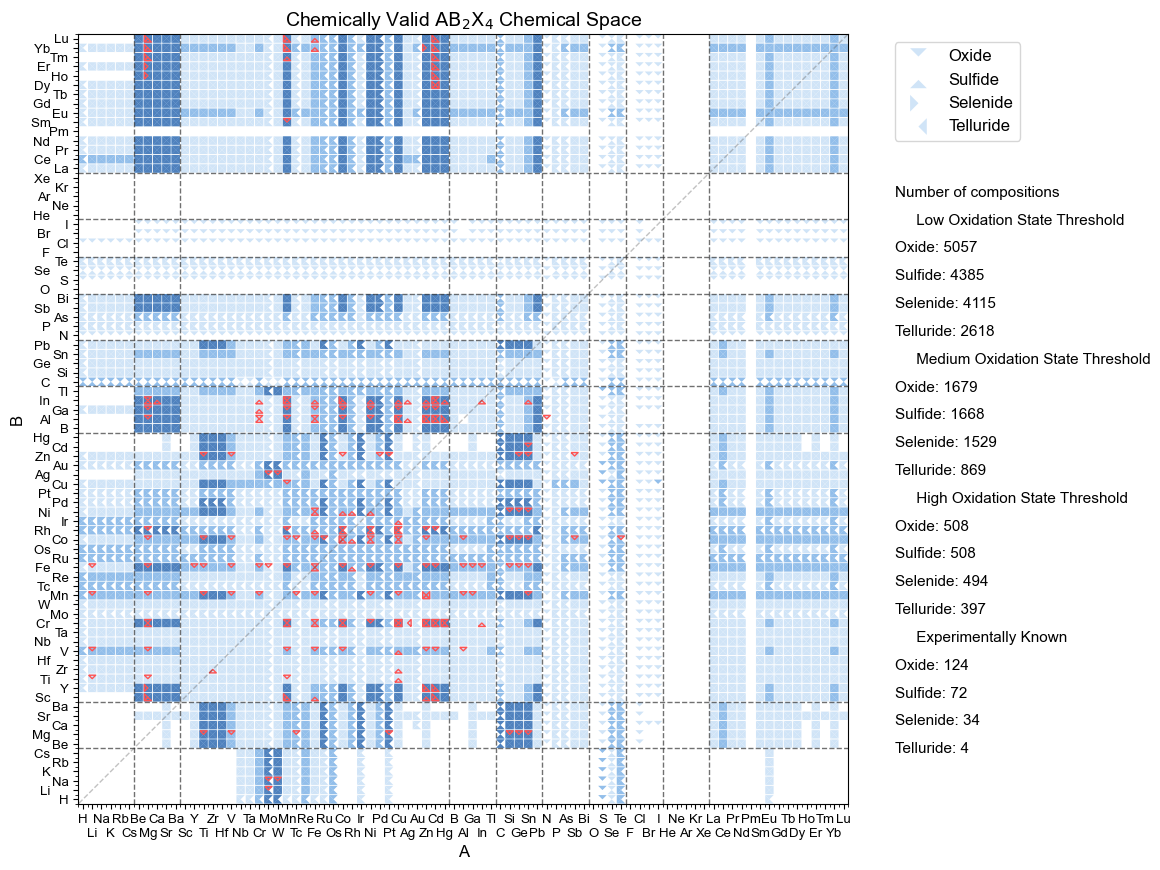

In [30]:
##Plotting Chemically Valid AB2X4 Chemical Space
##This plot was further modified in PowerPoint for better visualization, so the final version may look slightly different

#Marker settings
marker_oxide = [[-1,1],[0,0],[1,1],[-1,1]]#upper
marker_sulfide = [[-1,-1],[0,0],[1,-1],[-1,-1]]#lower
marker_selenide = [[-1,-1],[0,0],[-1,1],[-1,-1]]#left
marker_telluride = [[1,-1],[0,0],[1,1],[1,-1]]#right
#Colors
color_ox_threshold = ["#D0E4F7",'#92BEEA','#4F81BD']#blue

##Plotting
fig,ax=plt.subplots(figsize=fig_size)
ax.set_aspect(aspect_ratio)
ax.set_xlim([-0.5,82.5])
ax.set_ylim([-0.5,82.5])
#Set X and Y ticks to be elements sorted by group
ax.plot(list_elements_by_group,list_elements_by_group,'-',linewidth=0)
ax.set_xticks(list_elements_by_group,x_label,fontsize=ticks_label_size)
ax.set_yticks(list_elements_by_group,y_label,fontsize=ticks_label_size)
ax.set_xlabel('A',fontsize=axes_label_size, fontweight='bold')
ax.set_ylabel('B',fontsize=axes_label_size, fontweight='bold')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
#Set grid lines to separate element groups
custom_grid = [5.5, 10.5, 39.5, 44.5, 49.5, 54.5, 58.5, 62.5, 67.5]
for x in custom_grid:
    ax.axvline(x=x, linestyle='--', color=grid_color, linewidth=1, alpha=0.7)
    ax.axhline(y=x, linestyle='--', color=grid_color, linewidth=1, alpha=0.7)
#Diagonal line
x_diagonal=np.linspace(-10,100,10)
y_diagonal=x_diagonal
ax.plot(x_diagonal,y_diagonal,'--',color=grid_color,linewidth=1,alpha=0.3)
#Low oxidation state threshold
ax.scatter(x_smact_allowed_oxide_low,y_smact_allowed_oxide_low,marker=marker_oxide,edgecolor='None',c=color_ox_threshold[0],label='Oxide')
ax.scatter(x_smact_allowed_sulfide_low,y_smact_allowed_sulfide_low,marker=marker_sulfide,edgecolor='None',c=color_ox_threshold[0],label='Sulfide')
ax.scatter(x_smact_allowed_selenide_low,y_smact_allowed_selenide_low,marker=marker_selenide,edgecolor='None',c=color_ox_threshold[0],label='Selenide')
ax.scatter(x_smact_allowed_telluride_low,y_smact_allowed_telluride_low,marker=marker_telluride,edgecolor='None',c=color_ox_threshold[0],label='Telluride')
#Medium oxidation state threshold
ax.scatter(x_smact_allowed_oxide_medium,y_smact_allowed_oxide_medium,marker=marker_oxide,edgecolor='None',c=color_ox_threshold[1])
ax.scatter(x_smact_allowed_sulfide_medium,y_smact_allowed_sulfide_medium,marker=marker_sulfide,edgecolor='None',c=color_ox_threshold[1])
ax.scatter(x_smact_allowed_selenide_medium,y_smact_allowed_selenide_medium,marker=marker_selenide,edgecolor='None',c=color_ox_threshold[1])
ax.scatter(x_smact_allowed_telluride_medium,y_smact_allowed_telluride_medium,marker=marker_telluride,edgecolor='None',c=color_ox_threshold[1])
#High oxidation state threshold
ax.scatter(x_smact_allowed_oxide_high,y_smact_allowed_oxide_high,marker=marker_oxide,edgecolor='None',c=color_ox_threshold[2])
ax.scatter(x_smact_allowed_sulfide_high,y_smact_allowed_sulfide_high,marker=marker_sulfide,edgecolor='None',c=color_ox_threshold[2])
ax.scatter(x_smact_allowed_selenide_high,y_smact_allowed_selenide_high,marker=marker_selenide,edgecolor='None',c=color_ox_threshold[2])
ax.scatter(x_smact_allowed_telluride_high,y_smact_allowed_telluride_high,marker=marker_telluride,edgecolor='None',c=color_ox_threshold[2])
#Experimentally known
ax.scatter(x_exp_oxide,y_exp_oxide,marker=marker_oxide,facecolor='None',s=25, linewidths=1, edgecolor="#FE5353")
ax.scatter(x_exp_sulfide,y_exp_sulfide,marker=marker_sulfide,facecolor='None',s=25, linewidths=1,edgecolor="#FE5353")
ax.scatter(x_exp_selenide,y_exp_selenide,marker=marker_selenide,facecolor='None',s=25, linewidths=1,edgecolor="#FE5353")
ax.scatter(x_exp_telluride,y_exp_telluride,marker=marker_telluride,facecolor='None',s=25, linewidths=1,edgecolor="#FE5353")
#Plot title
ax.set_title(r'Chemically Valid $\mathrm{AB_2X_4}$ Chemical Space',fontsize=title_size)
#Plot legend
ax.legend(loc='upper left',bbox_to_anchor=(1.05,1),fontsize=legend_size,markerscale=2)
#Text box with number of compositions
txt_pos_x=87.5
txt_pos_y=65
ax.text(txt_pos_x, txt_pos_y, f'Number of compositions', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-3, f'     Low Oxidation State Threshold', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-6, f'Oxide: {len(df_smact_allowed_oxide_low)}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-9, f'Sulfide: {len(df_smact_allowed_sulfide_low)}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-12, f'Selenide: {len(df_smact_allowed_selenide_low)}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-15, f'Telluride: {len(df_smact_allowed_telluride_low)}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-18, f'     Medium Oxidation State Threshold', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-21, f'Oxide: {len(df_smact_allowed_oxide_medium)}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-24, f'Sulfide: {len(df_smact_allowed_sulfide_medium)}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-27, f'Selenide: {len(df_smact_allowed_selenide_medium)}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-30, f'Telluride: {len(df_smact_allowed_telluride_medium)}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-33, f'     High Oxidation State Threshold', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-36, f'Oxide: {len(df_smact_allowed_oxide_high)}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-39, f'Sulfide: {len(df_smact_allowed_sulfide_high)}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-42, f'Selenide: {len(df_smact_allowed_selenide_high)}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-45, f'Telluride: {len(df_smact_allowed_telluride_high)}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-48, r'     Experimentally Known', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-51, f'Oxide: {len(df_exp_oxide)}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-54, f'Sulfide: {len(df_exp_sulfide)}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-57, f'Selenide: {len(df_exp_selenide)}', fontsize=txt_size)
ax.text(txt_pos_x, txt_pos_y-60, f'Telluride: {len(df_exp_telluride)}', fontsize=txt_size)

fig.savefig('plots/1_chemically_valid_chemical_space.pdf', format='pdf', bbox_inches='tight')

Ehull plot

In [31]:
##Prepare x and y for plotting, only compositions that pass ehull criteria (<=0.2 eV) will be plotted here
def get_x_y_ehull(df,smact_oxi_thres):
    x = df[(df[smact_oxi_thres]==True) & (df['Ehull_min']<=0.20)]['A']
    y = df[(df[smact_oxi_thres]==True) & (df['Ehull_min']<=0.20)]['B']
    ehull = df[(df[smact_oxi_thres]==True) & (df['Ehull_min']<=0.20)]['Ehull_min']
    return x, y, ehull
# Low oxidation state threshold
x_ehull_oxide_low, y_ehull_oxide_low, ehull_oxide_low = get_x_y_ehull(df_oxide_all, 'SMACT_low')
x_ehull_sulfide_low, y_ehull_sulfide_low, ehull_sulfide_low = get_x_y_ehull(df_sulfide_all, 'SMACT_low')
x_ehull_selenide_low, y_ehull_selenide_low, ehull_selenide_low = get_x_y_ehull(df_selenide_all, 'SMACT_low')
x_ehull_telluride_low, y_ehull_telluride_low, ehull_telluride_low = get_x_y_ehull(df_telluride_all, 'SMACT_low')

# Medium oxidation state threshold
x_ehull_oxide_medium, y_ehull_oxide_medium, ehull_oxide_medium = get_x_y_ehull(df_oxide_all, 'SMACT_medium')
x_ehull_sulfide_medium, y_ehull_sulfide_medium, ehull_sulfide_medium = get_x_y_ehull(df_sulfide_all, 'SMACT_medium')
x_ehull_selenide_medium, y_ehull_selenide_medium, ehull_selenide_medium = get_x_y_ehull(df_selenide_all, 'SMACT_medium')
x_ehull_telluride_medium, y_ehull_telluride_medium, ehull_telluride_medium = get_x_y_ehull(df_telluride_all, 'SMACT_medium')

# High oxidation state threshold
x_ehull_oxide_high, y_ehull_oxide_high, ehull_oxide_high = get_x_y_ehull(df_oxide_all, 'SMACT_high')
x_ehull_sulfide_high, y_ehull_sulfide_high, ehull_sulfide_high = get_x_y_ehull(df_sulfide_all, 'SMACT_high')
x_ehull_selenide_high, y_ehull_selenide_high, ehull_selenide_high = get_x_y_ehull(df_selenide_all, 'SMACT_high')
x_ehull_telluride_high, y_ehull_telluride_high, ehull_telluride_high = get_x_y_ehull(df_telluride_all, 'SMACT_high')

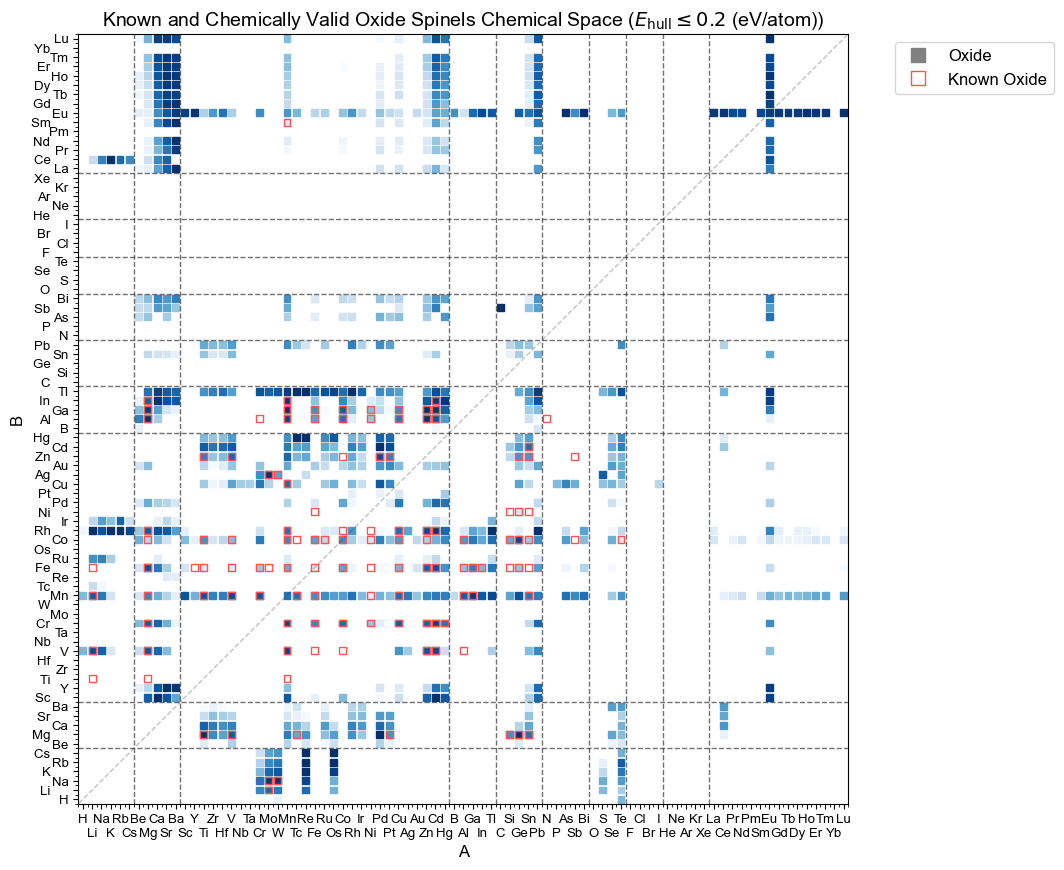

In [32]:
##SMACT valid Oxide with known data with super score

##Setting x, y, and SuperScore data for plotting, just change the x and y data to plot different sets
x_data = x_ehull_oxide_medium
y_data = y_ehull_oxide_medium
score_data = ehull_oxide_medium

spinel_type_list = ['Oxide', 'Sulfide', 'Selenide', 'Telluride']
spinel_type = spinel_type_list[0] #Change this according to the type of spinel
oxi_threshold_type_list = ['low', 'medium', 'high']
oxi_threshold_type = oxi_threshold_type_list[1] #Change this according to the oxidation

##Setting colormap
colormap = sns.color_palette("Blues", as_cmap=True).reversed() ##In this case, the lower the ehull, the darker the blue color. So the darker means more likely to be stable

##Chemical space from SMACT with low oxidation state threshold
x_diagonal=np.linspace(-10,100,10)
y_diagonal=x_diagonal
fig,ax=plt.subplots(figsize=fig_size)
ax.set_aspect(aspect_ratio)
ax.set_xlim([-0.5,82.5])
ax.set_ylim([-0.5,82.5])
ax.plot(list_elements_by_group,list_elements_by_group,'-',linewidth=0)
ax.plot(x_diagonal,y_diagonal,'--',color=grid_color,linewidth=1,alpha=0.3)

img = ax.scatter(x_data,y_data,marker='s',s=25,c=score_data,cmap=colormap)
ax.scatter(x_exp_oxide,y_exp_oxide,marker='s',s=25,facecolor='None', edgecolor="#FE5353")

ax.set_title(f'Known and Chemically Valid {spinel_type} Spinels Chemical Space ' + r'($E_\mathrm{hull} \leq 0.2$ (eV/atom))', fontsize=title_size)
ax.set_xticks(list_elements_by_group,x_label,fontsize=ticks_label_size)
ax.set_yticks(list_elements_by_group,y_label,fontsize=ticks_label_size)
ax.set_xlabel('A',fontsize=axes_label_size, fontweight='bold')
ax.set_ylabel('B',fontsize=axes_label_size, fontweight='bold')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
custom_grid = [5.5, 10.5, 39.5, 44.5, 49.5, 54.5, 58.5, 62.5, 67.5]
for x in custom_grid:
    ax.axvline(x=x, linestyle='--', color=grid_color, linewidth=1, alpha=0.7)
    ax.axhline(y=x, linestyle='--', color=grid_color, linewidth=1, alpha=0.7)
txt_pos_x=87.5
txt_pos_y=65

legend_elements = [
    Line2D([0], [0], marker='s', color='grey', markeredgecolor=None, label='Oxide', markersize=5, linestyle='None'),
    Line2D([0], [0], marker='s', color='w', markeredgecolor="#FE5353", label='Known Oxide', markersize=5, linestyle='None')
]

ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05,1),fontsize=legend_size,markerscale=2)

##Color bar, this was further added to the plot in PowerPoint for better visualization, so the final version may look slightly different
# cbar = fig.colorbar(img, ax=ax, orientation='vertical',boundaries=np.linspace(0, 1,1000), ticks=np.linspace(0, 1, 5))
# cbar.ax.set_position([0.783, 0.4, 1, 0.3])
# cbar.set_label(r'$E_\mathrm{hull}$', fontsize=axes_label_size, labelpad=20)

fig.savefig(f'plots/2_ehull_{oxi_threshold_type}_{spinel_type}_spinels.pdf', format='pdf', bbox_inches='tight')

CLscore plot

In [33]:
##Prepare x and y for plotting, only compositions that pass clscore criteria (>=0.5) will be plotted here
def get_x_y_clscore(df,smact_oxi_thres):
    x = df[(df[smact_oxi_thres]==True) & (df['SuperScore']>=0.5)]['A']
    y = df[(df[smact_oxi_thres]==True) & (df['SuperScore']>=0.5)]['B']
    clscore = df[(df[smact_oxi_thres]==True) & (df['SuperScore']>=0.5)]['SuperScore']
    return x, y, clscore

# Low oxidation state threshold
x_clscore_oxide_low, y_clscore_oxide_low, clscore_oxide_low = get_x_y_clscore(df_oxide_all, 'SMACT_low')
x_clscore_sulfide_low, y_clscore_sulfide_low, clscore_sulfide_low = get_x_y_clscore(df_sulfide_all, 'SMACT_low')
x_clscore_selenide_low, y_clscore_selenide_low, clscore_selenide_low = get_x_y_clscore(df_selenide_all, 'SMACT_low')
x_clscore_telluride_low, y_clscore_telluride_low, clscore_telluride_low = get_x_y_clscore(df_telluride_all, 'SMACT_low')

# Medium oxidation state threshold
x_clscore_oxide_medium, y_clscore_oxide_medium, clscore_oxide_medium = get_x_y_clscore(df_oxide_all, 'SMACT_medium')
x_clscore_sulfide_medium, y_clscore_sulfide_medium, clscore_sulfide_medium = get_x_y_clscore(df_sulfide_all, 'SMACT_medium')
x_clscore_selenide_medium, y_clscore_selenide_medium, clscore_selenide_medium = get_x_y_clscore(df_selenide_all, 'SMACT_medium')
x_clscore_telluride_medium, y_clscore_telluride_medium, clscore_telluride_medium = get_x_y_clscore(df_telluride_all, 'SMACT_medium')

# High oxidation state threshold
x_clscore_oxide_high, y_clscore_oxide_high, clscore_oxide_high = get_x_y_clscore(df_oxide_all, 'SMACT_high')
x_clscore_sulfide_high, y_clscore_sulfide_high, clscore_sulfide_high = get_x_y_clscore(df_sulfide_all, 'SMACT_high')
x_clscore_selenide_high, y_clscore_selenide_high, clscore_selenide_high = get_x_y_clscore(df_selenide_all, 'SMACT_high')
x_clscore_telluride_high, y_clscore_telluride_high, clscore_telluride_high = get_x_y_clscore(df_telluride_all, 'SMACT_high')

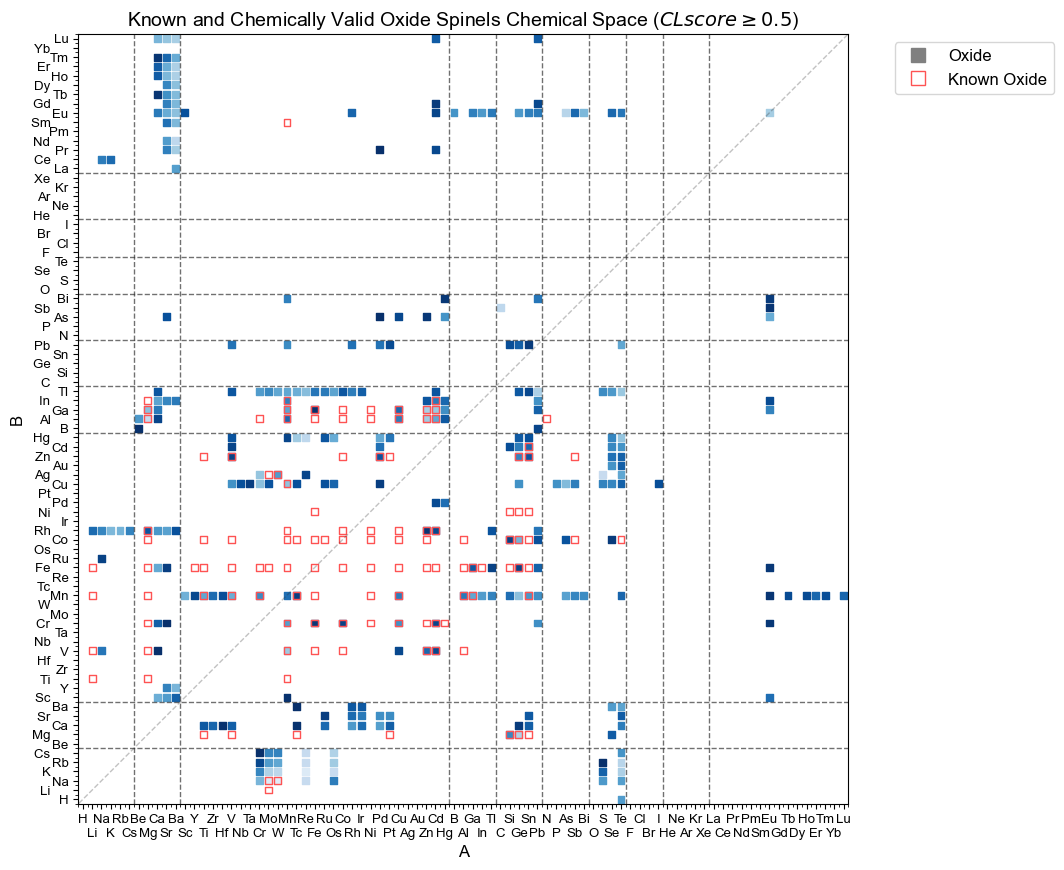

In [34]:
##SMACT valid Oxide with known data with super score

##Setting x, y, and SuperScore data for plotting, just change the x and y data to plot different sets
x_data = x_clscore_oxide_medium
y_data = y_clscore_oxide_medium
score_data = clscore_oxide_medium

spinel_type_list = ['Oxide', 'Sulfide', 'Selenide', 'Telluride']
spinel_type = spinel_type_list[0] #Change this according to the type of spinel
oxi_threshold_type_list = ['low', 'medium', 'high']
oxi_threshold_type = oxi_threshold_type_list[1] #Change this according to the oxidation

##Setting colormap
colormap = sns.color_palette("Blues", as_cmap=True).reversed() ##In this case, the lower the ehull, the darker the blue color. So the darker means more likely to be stable

##Chemical space from SMACT with low oxidation state threshold
x_diagonal=np.linspace(-10,100,10)
y_diagonal=x_diagonal
fig,ax=plt.subplots(figsize=fig_size)
ax.set_aspect(aspect_ratio)
ax.set_xlim([-0.5,82.5])
ax.set_ylim([-0.5,82.5])
ax.plot(list_elements_by_group,list_elements_by_group,'-',linewidth=0)
ax.plot(x_diagonal,y_diagonal,'--',color=grid_color,linewidth=1,alpha=0.3)

img = ax.scatter(x_data,y_data,marker='s',s=25,c=score_data,cmap=colormap)
ax.scatter(x_exp_oxide,y_exp_oxide,marker='s',s=25,facecolor='None', edgecolor="#FE5353")

ax.set_title(f'Known and Chemically Valid {spinel_type} Spinels Chemical Space ' + r'($CLscore \geq 0.5$)', fontsize=title_size)
ax.set_xticks(list_elements_by_group,x_label,fontsize=ticks_label_size)
ax.set_yticks(list_elements_by_group,y_label,fontsize=ticks_label_size)
ax.set_xlabel('A',fontsize=axes_label_size, fontweight='bold')
ax.set_ylabel('B',fontsize=axes_label_size, fontweight='bold')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
custom_grid = [5.5, 10.5, 39.5, 44.5, 49.5, 54.5, 58.5, 62.5, 67.5]
for x in custom_grid:
    ax.axvline(x=x, linestyle='--', color=grid_color, linewidth=1, alpha=0.7)
    ax.axhline(y=x, linestyle='--', color=grid_color, linewidth=1, alpha=0.7)
txt_pos_x=87.5
txt_pos_y=65

legend_elements = [
    Line2D([0], [0], marker='s', color='grey', markeredgecolor=None, label='Oxide', markersize=5, linestyle='None'),
    Line2D([0], [0], marker='s', color='w', markeredgecolor="#FE5353", label='Known Oxide', markersize=5, linestyle='None')
]

ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05,1),fontsize=legend_size,markerscale=2)

##Color bar, this was further added to the plot in PowerPoint for better visualization, so the final version may look slightly different
# cbar = fig.colorbar(img, ax=ax, orientation='vertical',boundaries=np.linspace(0, 1,1000), ticks=np.linspace(0, 1, 5))
# cbar.ax.set_position([0.783, 0.4, 1, 0.3])
# cbar.set_label(r'$CLscore$', fontsize=axes_label_size, labelpad=20)

fig.savefig(f'plots/3_clscore_{oxi_threshold_type}_{spinel_type}_spinels.pdf', format='pdf', bbox_inches='tight')

Super score plot

In [35]:
##Prepare x and y for plotting, only compositions that pass super score screening will be plotted here
def get_x_y_super_score(df,smact_oxi_thres):
    x = df[(df[smact_oxi_thres]==True) & (df['SuperScore'].notna())]['A']
    y = df[(df[smact_oxi_thres]==True) & (df['SuperScore'].notna())]['B']
    super_score = df[(df[smact_oxi_thres]==True) & (df['SuperScore'].notna())]['SuperScore']
    return x, y, super_score

# Low oxidation state threshold
x_super_score_oxide_low, y_super_score_oxide_low, super_score_oxide_low = get_x_y_super_score(df_oxide_all, 'SMACT_low')
x_super_score_sulfide_low, y_super_score_sulfide_low, super_score_sulfide_low = get_x_y_super_score(df_sulfide_all, 'SMACT_low')
x_super_score_selenide_low, y_super_score_selenide_low, super_score_selenide_low = get_x_y_super_score(df_selenide_all, 'SMACT_low')
x_super_score_telluride_low, y_super_score_telluride_low, super_score_telluride_low = get_x_y_super_score(df_telluride_all, 'SMACT_low')
# Medium oxidation state threshold
x_super_score_oxide_medium, y_super_score_oxide_medium, super_score_oxide_medium = get_x_y_super_score(df_oxide_all, 'SMACT_medium')
x_super_score_sulfide_medium, y_super_score_sulfide_medium, super_score_sulfide_medium = get_x_y_super_score(df_sulfide_all, 'SMACT_medium')
x_super_score_selenide_medium, y_super_score_selenide_medium, super_score_selenide_medium = get_x_y_super_score(df_selenide_all, 'SMACT_medium')
x_super_score_telluride_medium, y_super_score_telluride_medium, super_score_telluride_medium = get_x_y_super_score(df_telluride_all, 'SMACT_medium')
# High oxidation state threshold
x_super_score_oxide_high, y_super_score_oxide_high, super_score_oxide_high = get_x_y_super_score(df_oxide_all, 'SMACT_high')
x_super_score_sulfide_high, y_super_score_sulfide_high, super_score_sulfide_high = get_x_y_super_score(df_sulfide_all, 'SMACT_high')
x_super_score_selenide_high, y_super_score_selenide_high, super_score_selenide_high = get_x_y_super_score(df_selenide_all, 'SMACT_high')
x_super_score_telluride_high, y_super_score_telluride_high, super_score_telluride_high = get_x_y_super_score(df_telluride_all, 'SMACT_high')

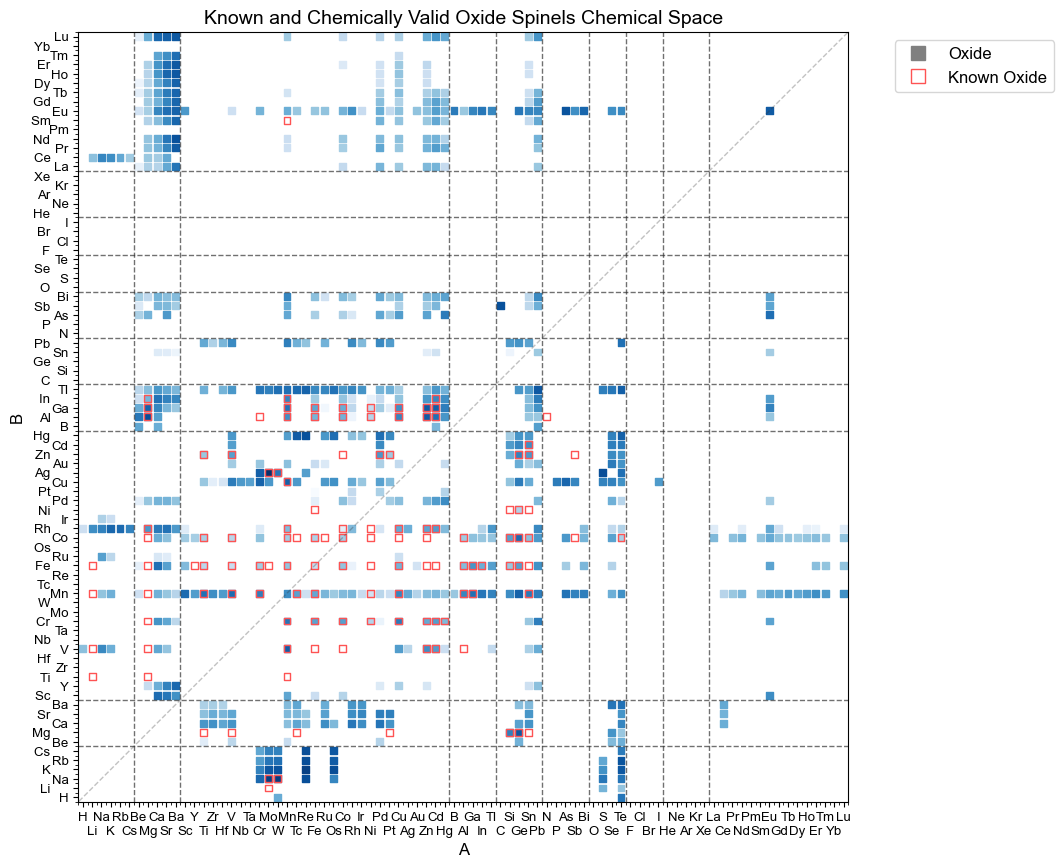

In [36]:
##SMACT valid Oxide with known data with super score

##Setting x, y, and SuperScore data for plotting, just change the x and y data to plot different sets
x_data = x_super_score_oxide_medium
y_data = y_super_score_oxide_medium
score_data = super_score_oxide_medium

spinel_type_list = ['Oxide', 'Sulfide', 'Selenide', 'Telluride']
spinel_type = spinel_type_list[0] #Change this according to the type of spinel
oxi_threshold_type_list = ['low', 'medium', 'high']
oxi_threshold_type = oxi_threshold_type_list[1] #Change this according to the oxidation

##Setting colormap
colormap = sns.color_palette("Blues", as_cmap=True)

##Chemical space from SMACT with low oxidation state threshold
x_diagonal=np.linspace(-10,100,10)
y_diagonal=x_diagonal
fig,ax=plt.subplots(figsize=fig_size)
ax.set_aspect(aspect_ratio)
ax.set_xlim([-0.5,82.5])
ax.set_ylim([-0.5,82.5])
ax.plot(list_elements_by_group,list_elements_by_group,'-',linewidth=0)
ax.plot(x_diagonal,y_diagonal,'--',color=grid_color,linewidth=1,alpha=0.3)

img = ax.scatter(x_data,y_data,marker='s',s=25,c=score_data,cmap=colormap)
ax.scatter(x_exp_oxide,y_exp_oxide,marker='s',s=25,facecolor='None', edgecolor="#FE5353")

ax.set_title(f'Known and Chemically Valid {spinel_type} Spinels Chemical Space',fontsize=title_size)
ax.set_xticks(list_elements_by_group,x_label,fontsize=ticks_label_size)
ax.set_yticks(list_elements_by_group,y_label,fontsize=ticks_label_size)
ax.set_xlabel('A',fontsize=axes_label_size, fontweight='bold')
ax.set_ylabel('B',fontsize=axes_label_size, fontweight='bold')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
custom_grid = [5.5, 10.5, 39.5, 44.5, 49.5, 54.5, 58.5, 62.5, 67.5]
for x in custom_grid:
    ax.axvline(x=x, linestyle='--', color=grid_color, linewidth=1, alpha=0.7)
    ax.axhline(y=x, linestyle='--', color=grid_color, linewidth=1, alpha=0.7)
txt_pos_x=87.5
txt_pos_y=65

legend_elements = [
    Line2D([0], [0], marker='s', color='grey', markeredgecolor=None, label='Oxide', markersize=5, linestyle='None'),
    Line2D([0], [0], marker='s', color='w', markeredgecolor="#FE5353", label='Known Oxide', markersize=5, linestyle='None')
]

ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05,1),fontsize=legend_size,markerscale=2)

##Color bar, this was further added to the plot in PowerPoint for better visualization, so the final version may look slightly different
# cbar = fig.colorbar(img, ax=ax, orientation='vertical',boundaries=np.linspace(0, 1,1000), ticks=np.linspace(0, 1, 5))
# cbar.ax.set_position([0.783, 0.4, 1, 0.3])
# cbar.set_label(r'$S_\mathrm{score}$', fontsize=axes_label_size, labelpad=20)

fig.savefig(f'plots/4_super_score_{oxi_threshold_type}_{spinel_type}_spinels.pdf', format='pdf', bbox_inches='tight')

Inversion parameter plot

In [37]:
##Prepare x and y for plotting, only compositions that super score screening will be plotted here, also A3X4 will not be plotted here since we cannot calculate the inversion parameter for A3X4
def get_x_y_inv_param(df,smact_oxi_thres):
    x = df[(df[smact_oxi_thres]==True) & (df['inversion_parameter'].notna())]['A']
    y = df[(df[smact_oxi_thres]==True) & (df['inversion_parameter'].notna())]['B']
    inv_score = df[(df[smact_oxi_thres]==True) & (df['inversion_parameter'].notna())]['inversion_parameter']
    return x, y, inv_score

# Low oxidation state threshold
x_inv_oxide_low, y_inv_oxide_low, inv_param_data_oxide_low = get_x_y_inv_param(df_oxide_all, 'SMACT_low')
x_inv_sulfide_low, y_inv_sulfide_low, inv_param_data_sulfide_low = get_x_y_inv_param(df_sulfide_all, 'SMACT_low')
x_inv_selenide_low, y_inv_selenide_low, inv_param_data_selenide_low = get_x_y_inv_param(df_selenide_all, 'SMACT_low')
x_inv_telluride_low, y_inv_telluride_low, inv_param_data_telluride_low = get_x_y_inv_param(df_telluride_all, 'SMACT_low')
# Medium oxidation state threshold
x_inv_oxide_medium, y_inv_oxide_medium, inv_param_data_oxide_medium = get_x_y_inv_param(df_oxide_all, 'SMACT_medium')
x_inv_sulfide_medium, y_inv_sulfide_medium, inv_param_data_sulfide_medium = get_x_y_inv_param(df_sulfide_all, 'SMACT_medium')
x_inv_selenide_medium, y_inv_selenide_medium, inv_param_data_selenide_medium = get_x_y_inv_param(df_selenide_all, 'SMACT_medium')
x_inv_telluride_medium, y_inv_telluride_medium, inv_param_data_telluride_medium = get_x_y_inv_param(df_telluride_all, 'SMACT_medium')
# High oxidation state threshold
x_inv_oxide_high, y_inv_oxide_high, inv_param_data_oxide_high = get_x_y_inv_param(df_oxide_all, 'SMACT_high')
x_inv_sulfide_high, y_inv_sulfide_high, inv_param_data_sulfide_high = get_x_y_inv_param(df_sulfide_all, 'SMACT_high')
x_inv_selenide_high, y_inv_selenide_high, inv_param_data_selenide_high = get_x_y_inv_param(df_selenide_all, 'SMACT_high')
x_inv_telluride_high, y_inv_telluride_high, inv_param_data_telluride_high = get_x_y_inv_param(df_telluride_all, 'SMACT_high')

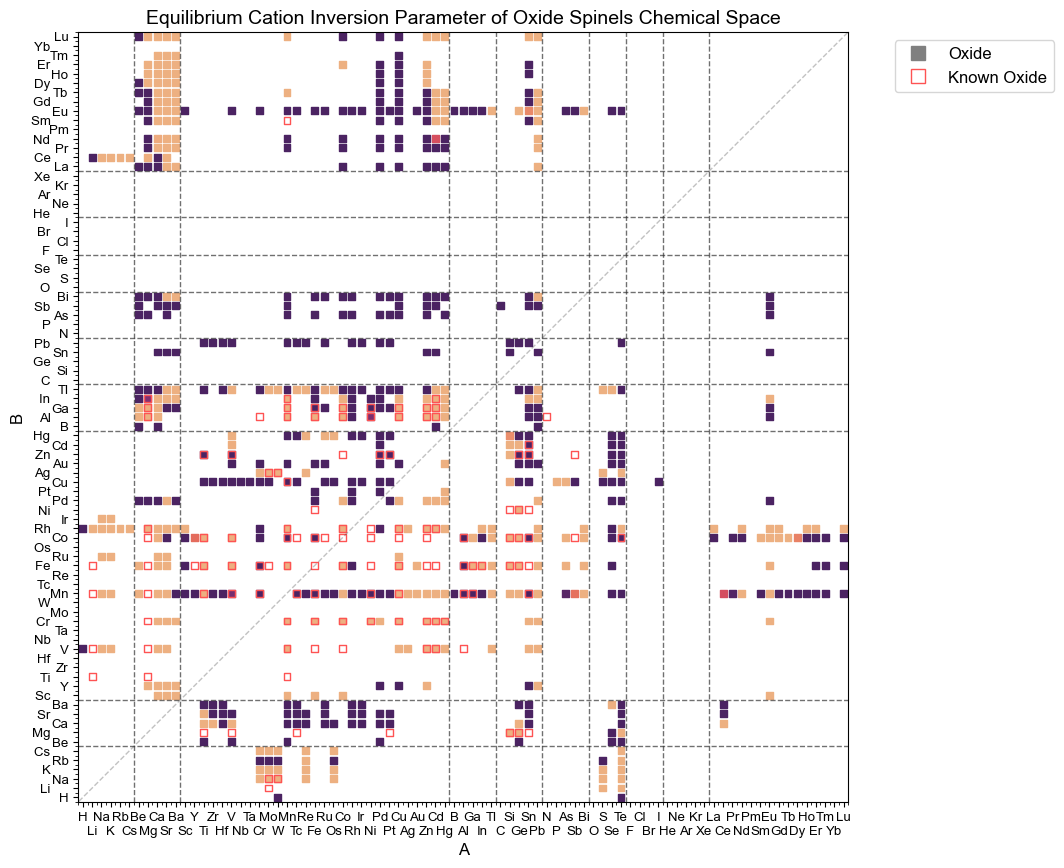

In [38]:
##SMACT valid Oxide with known data with super score

##Setting X, Y, and SuperScore data for plotting, just change the X and Y data to plot different sets
x_data = x_inv_oxide_medium
y_data = y_inv_oxide_medium
score_data = inv_param_data_oxide_medium

spinel_type_list = ['Oxide', 'Sulfide', 'Selenide', 'Telluride']
spinel_type = spinel_type_list[0] #Change this according to the type of spinel
oxi_threshold_type_list = ['low', 'medium', 'high']
oxi_threshold_type = oxi_threshold_type_list[1] #Change this according to the oxidation

##Setting colormap
colormap = sns.color_palette("flare", as_cmap=True)

##Chemical space from SMACT with low oxidation state threshold
x_diagonal=np.linspace(-10,100,10)
y_diagonal=x_diagonal
fig,ax=plt.subplots(figsize=fig_size)
ax.set_aspect(aspect_ratio)
ax.set_xlim([-0.5,82.5])
ax.set_ylim([-0.5,82.5])
ax.plot(list_elements_by_group,list_elements_by_group,'-',linewidth=0)
ax.plot(x_diagonal,y_diagonal,'--',color=grid_color,linewidth=1,alpha=0.3)

img = ax.scatter(x_data,y_data,marker='s',s=25,c=score_data,cmap=colormap)
ax.scatter(x_exp_oxide,y_exp_oxide,marker='s',s=25,facecolor='None', edgecolor="#FE5353")

ax.set_title(f'Equilibrium Cation Inversion Parameter of {spinel_type} Spinels Chemical Space',fontsize=title_size)
ax.set_xticks(list_elements_by_group,x_label,fontsize=ticks_label_size)
ax.set_yticks(list_elements_by_group,y_label,fontsize=ticks_label_size)
ax.set_xlabel('A',fontsize=axes_label_size, fontweight='bold')
ax.set_ylabel('B',fontsize=axes_label_size, fontweight='bold')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
custom_grid = [5.5, 10.5, 39.5, 44.5, 49.5, 54.5, 58.5, 62.5, 67.5]
for x in custom_grid:
    ax.axvline(x=x, linestyle='--', color=grid_color, linewidth=1, alpha=0.7)
    ax.axhline(y=x, linestyle='--', color=grid_color, linewidth=1, alpha=0.7)
txt_pos_x=87.5
txt_pos_y=65

legend_elements = [
    Line2D([0], [0], marker='s', color='grey', markeredgecolor=None, label='Oxide', markersize=5, linestyle='None'),
    Line2D([0], [0], marker='s', color='w', markeredgecolor="#FE5353", label='Known Oxide', markersize=5, linestyle='None')
]

ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05,1),fontsize=legend_size,markerscale=2)

##Color bar, this was further added to the plot in PowerPoint for better visualization, so the final version may look slightly different
# cbar = fig.colorbar(img, ax=ax, orientation='vertical',boundaries=np.linspace(0, 1,1000), ticks=np.linspace(0, 1, 5))
# cbar.ax.set_position([0.783, 0.4, 1, 0.3])
# cbar.set_label(r'x_\mathrm{eq}', fontsize=axes_label_size, labelpad=20)

fig.savefig(f'plots/5_inversion_parameter_{oxi_threshold_type}_{spinel_type}_spinels.pdf', format='pdf', bbox_inches='tight')

Find fraction of recovered experimentally known spinels

In [39]:
##Function to find number and percentage of experimental compounds recovered by different Ehull for SMACT low, medium and high oxidation state allowed compositions
def find_n_exp_recovered_ehull(df, ehull_thresholds):
    count_low = [0,0,0,0,0,0,0,0,0,0,0]
    count_medium = [0,0,0,0,0,0,0,0,0,0,0]
    count_high = [0,0,0,0,0,0,0,0,0,0,0]
    for i in range(len(df)):
        if df['SMACT_low'][i] == True:
            ehull_low = df['Ehull_min'][i]
            for j in range(len(ehull_thresholds)):
                if not np.isnan(ehull_low) and ehull_low <= ehull_thresholds[j] and df['Experimental'][i] == True:
                    count_low[j] += 1
    for i in range(len(df)): #The loop needs to be separated to iterate through the dataframe again
        if df['SMACT_medium'][i] == True:
            ehull_medium = df['Ehull_min'][i]
            for j in range(len(ehull_thresholds)):
                if not np.isnan(ehull_medium) and ehull_medium <= ehull_thresholds[j] and df['Experimental'][i] == True:
                    count_medium[j] += 1
    for i in range(len(df)): #The loop needs to be separated to iterate through the dataframe again
        if df['SMACT_high'][i] == True:
            ehull_high = df['Ehull_min'][i]
            for j in range(len(ehull_thresholds)):
                if not np.isnan(ehull_high) and ehull_high <= ehull_thresholds[j] and df['Experimental'][i] == True:
                    count_high[j] += 1
    df_count = pd.DataFrame({'Ehull_threshold': ehull_thresholds, 'Count_low': count_low, 'Count_medium': count_medium, 'Count_high': count_high})
    df_count['Percentage_low'] = df_count['Count_low'] / df['Experimental'].sum() * 100
    df_count['Percentage_medium'] = df_count['Count_medium'] / df['Experimental'].sum() * 100
    df_count['Percentage_high'] = df_count['Count_high'] / df['Experimental'].sum() * 100
    return df_count

##Function to find number and percentage of experimental compounds recovered by different CLscore for SMACT low, medium and high oxidation state allowed compositions
def find_n_exp_recovered_clscore(df, clscore_thresholds):
    count_low = [0,0,0,0,0,0,0,0,0,0,0]
    count_medium = [0,0,0,0,0,0,0,0,0,0,0]
    count_high = [0,0,0,0,0,0,0,0,0,0,0]
    for i in range(len(df)):
        if df['SMACT_low'][i] == True:
            clscore_low = df['CLscore'][i]
            for j in range(len(clscore_thresholds)):
                if not np.isnan(clscore_low) and clscore_low >= clscore_thresholds[j] and df['Experimental'][i] == True:
                    count_low[j] += 1
    for i in range(len(df)): #The loop needs to be separated to iterate through the dataframe again
        if df['SMACT_medium'][i] == True:
            clscore_medium = df['CLscore'][i]
            for j in range(len(clscore_thresholds)):
                if not np.isnan(clscore_medium) and clscore_medium >= clscore_thresholds[j] and df['Experimental'][i] == True:
                    count_medium[j] += 1
    for i in range(len(df)): #The loop needs to be separated to iterate through the dataframe again
        if df['SMACT_high'][i] == True:
            clscore_high = df['CLscore'][i]
            for j in range(len(clscore_thresholds)):
                if not np.isnan(clscore_high) and clscore_high >= clscore_thresholds[j] and df['Experimental'][i] == True:
                    count_high[j] += 1
    df_count = pd.DataFrame({'CLscore_threshold': clscore_thresholds, 'Count_low': count_low, 'Count_medium': count_medium, 'Count_high': count_high})
    df_count['Percentage_low'] = df_count['Count_low'] / df['Experimental'].sum() * 100
    df_count['Percentage_medium'] = df_count['Count_medium'] / df['Experimental'].sum() * 100
    df_count['Percentage_high'] = df_count['Count_high'] / df['Experimental'].sum() * 100
    return df_count

##Function to find number and percentage of experimental compounds recovered by different Super score for SMACT low, medium and high oxidation state allowed compositions
def find_n_exp_recovered_superscore(df, superscore_thresholds):
    count_low = [0,0,0,0,0,0,0,0,0,0,0]
    count_medium = [0,0,0,0,0,0,0,0,0,0,0]
    count_high = [0,0,0,0,0,0,0,0,0,0,0]
    for i in range(len(df)):
        if df['SMACT_low'][i] == True:
            superscore_low = df['SuperScore'][i]
            for j in range(len(superscore_thresholds)):
                if not np.isnan(superscore_low) and superscore_low >= superscore_thresholds[j] and df['Experimental'][i] == True:
                    count_low[j] += 1
    for i in range(len(df)): #The loop needs to be separated to iterate through the dataframe again
        if df['SMACT_medium'][i] == True:
            superscore_medium = df['SuperScore'][i]
            for j in range(len(superscore_thresholds)):
                if not np.isnan(superscore_medium) and superscore_medium >= superscore_thresholds[j] and df['Experimental'][i] == True:
                    count_medium[j] += 1
    for i in range(len(df)): #The loop needs to be separated to iterate through the dataframe again
        if df['SMACT_high'][i] == True:
            superscore_high = df['SuperScore'][i]
            for j in range(len(superscore_thresholds)):
                if not np.isnan(superscore_high) and superscore_high >= superscore_thresholds[j] and df['Experimental'][i] == True:
                    count_high[j] += 1
    df_count = pd.DataFrame({'SuperScore_threshold': superscore_thresholds, 'Count_low': count_low, 'Count_medium': count_medium, 'Count_high': count_high})
    df_count['Percentage_low'] = df_count['Count_low'] / df['Experimental'].sum() * 100
    df_count['Percentage_medium'] = df_count['Count_medium'] / df['Experimental'].sum() * 100
    df_count['Percentage_high'] = df_count['Count_high'] / df['Experimental'].sum() * 100
    return df_count

In [40]:
ehull_thresholds_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
df_exp_recovered_oxide_ehull = find_n_exp_recovered_ehull(df_oxide_all, ehull_thresholds_list)
df_exp_recovered_sulfide_ehull = find_n_exp_recovered_ehull(df_sulfide_all, ehull_thresholds_list)
df_exp_recovered_selenide_ehull = find_n_exp_recovered_ehull(df_selenide_all, ehull_thresholds_list)
df_exp_recovered_telluride_ehull = find_n_exp_recovered_ehull(df_telluride_all, ehull_thresholds_list)

pul_thresholds_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
df_exp_recovered_oxide_clscore = find_n_exp_recovered_clscore(df_oxide_all, pul_thresholds_list)
df_exp_recovered_sulfide_clscore = find_n_exp_recovered_clscore(df_sulfide_all, pul_thresholds_list)
df_exp_recovered_selenide_clscore = find_n_exp_recovered_clscore(df_selenide_all, pul_thresholds_list)
df_exp_recovered_telluride_clscore = find_n_exp_recovered_clscore(df_telluride_all, pul_thresholds_list)

super_score_thresholds_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
df_exp_recovered_oxide_superscore = find_n_exp_recovered_superscore(df_oxide_all, super_score_thresholds_list)
df_exp_recovered_sulfide_superscore = find_n_exp_recovered_superscore(df_sulfide_all, super_score_thresholds_list)
df_exp_recovered_selenide_superscore = find_n_exp_recovered_superscore(df_selenide_all, super_score_thresholds_list)
df_exp_recovered_telluride_superscore = find_n_exp_recovered_superscore(df_telluride_all, super_score_thresholds_list)

In [41]:
df_exp_recovered_oxide_ehull

,Ehull_threshold,Count_low,Count_medium,Count_high,Percentage_low,Percentage_medium,Percentage_high
0,0.0,5,5,5,4.032258,4.032258,4.032258
1,0.1,83,80,52,66.935484,64.516129,41.935484
2,0.2,109,103,61,87.903226,83.064516,49.193548
3,0.3,119,111,63,95.967742,89.516129,50.806452
4,0.4,123,114,65,99.193548,91.935484,52.419355
5,0.5,123,114,65,99.193548,91.935484,52.419355
6,0.6,123,114,65,99.193548,91.935484,52.419355
7,0.7,123,114,65,99.193548,91.935484,52.419355
8,0.8,123,114,65,99.193548,91.935484,52.419355
9,0.9,123,114,65,99.193548,91.935484,52.419355


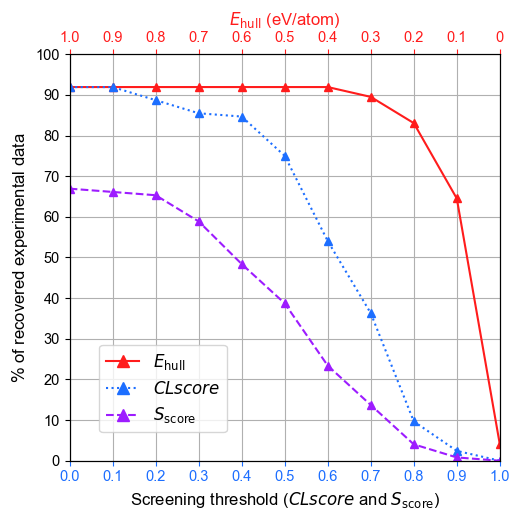

In [42]:
##Plotting the fraction of experimental compounds recovered by different Ehull, CLscore and Super score for SMACT medium oxidation state allowed oxide spinels
##This was further modified in PowerPoint for better visualization, so the final version may look slightly different

##Setting X, Y, and SuperScore data for plotting, just change the X and Y data to plot different sets
smact_oxi_threshold_type_list = ['Percentage_low', 'Percentage_medium', 'Percentage_high']
smact_oxi_threshold_type = smact_oxi_threshold_type_list[1] #Change this according to the oxidation state threshold

ehull_data = df_exp_recovered_oxide_ehull[smact_oxi_threshold_type]
clscore_data = df_exp_recovered_oxide_clscore[smact_oxi_threshold_type]
superscore_data = df_exp_recovered_oxide_superscore[smact_oxi_threshold_type],

spinel_type_list = ['Oxide', 'Sulfide', 'Selenide', 'Telluride']
spinel_type = spinel_type_list[0] #Change this according to the type of spinel
oxi_threshold_type_list = ['low', 'medium', 'high']
oxi_threshold_type = oxi_threshold_type_list[1] #Change this according to the oxidation

# Data
thresholds_ehull = ehull_thresholds_list[::-1]
thresholds_pul = pul_thresholds_list
thresholds_super = super_score_thresholds_list

spinel_type_list = ['Oxide', 'Sulfide', 'Selenide', 'Telluride']
spinel_type = spinel_type_list[0] #Change this according to the type of spinel
oxi_threshold_type_list = ['low', 'medium', 'high']
oxi_threshold_type = oxi_threshold_type_list[1] #Change this according to the oxidation

# Marker styles
colors = {
    'ehull': '#FF1C1C',
    'clscore': '#1C6EFF',
    'superscore': '#9D1CFF'
}

fig, ax = plt.subplots(figsize=(5.3, 5.3))

# Plot lines
ax.plot(thresholds_ehull, df_exp_recovered_oxide_ehull['Percentage_medium'], marker='^', linestyle='-', linewidth=1.5, color=colors['ehull'], label=r'$E_\mathrm{hull}$')
ax.plot(thresholds_pul, df_exp_recovered_oxide_clscore['Percentage_medium'], marker='^', linestyle=':', linewidth=1.5, color=colors['clscore'], label=r'$CLscore$')
ax.plot(thresholds_super, df_exp_recovered_oxide_superscore['Percentage_medium'], marker='^', linestyle='--', linewidth=1.5, color=colors['superscore'], label=r'$S_\mathrm{score}$')

# Axis settings
ax.set_xticks(thresholds_pul)
ax.set_xlim(min(thresholds_pul), max(thresholds_pul))
ax.set_xlabel(r'Screening threshold ($CLscore$ and $S_\mathrm{score}$)', fontsize=axes_label_size, fontweight='bold', color='black')  # label color
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylim(0, 100)
ax.set_ylabel(r'$\%$ of recovered experimental data', fontsize=axes_label_size, fontweight='bold')
ax.tick_params(axis='x', colors=colors['clscore'])  # x-tick labels and marks in blue
# ax.spines['bottom'].set_color('blue')   # x-axis line in blue
ax.tick_params(axis='both', labelsize=10.5)

# Top x-axis
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())  # Match base axis limits
ax_top.set_xticks(thresholds_pul)
ax_top.set_xticklabels(thresholds_ehull)
ax_top.set_xlabel(r'$E_\mathrm{hull}$ (eV/atom)', fontsize=axes_label_size, fontweight='bold', color=colors['ehull'])  # label color
ax_top.tick_params(axis='x', colors=colors['ehull'])  # x-tick labels and marks in red
# ax_top.spines['top'].set_color('red')      # x-axis line in red
ax_top.tick_params(axis='both', labelsize=10.5)

# Legend and grid
ax.legend(loc='lower left', bbox_to_anchor=(0.05, 0.05), fontsize=legend_size, markerscale=1.5)
ax.grid(True)

plt.tight_layout()
plt.savefig(f'plots/6_fraction_of_recovered_{oxi_threshold_type}_{spinel_type}_spinels.pdf', format='pdf', bbox_inches='tight')
plt.show()
